
# Analyzing the Careers of Top California Distance Runners: 

# Exploratory Data Analysis for High School Running Continued Success Factors  

### Does the Athlete Make the Coach or the Coach Make the Athlete?
OR
### Does Success in High School Running Predict Success in College?

California high schools have produced hundreds of amazing runners that have gone on to continue to run and compete in college.  Are there any lessons learned or obvious trends in the data that can help predict success factors for star high school runners as they attempt to choose the "right" university and competitive level (D1,D2,D3, club) for them.

Deciding to compete in college at the NCAA Division 1 level takes a high level of success in high school and focus and determination in college.  Not all high schoolers will go on to continued success.  Is this a matter of their collegiate academic pressures? their changing interests and expanded horizons that college environment affords? Does the level of training or over-training in high school determine if they still have room for development in college?  

#### What take-aways will the data reveal? 
##### - The data has been collated from several running websites and google searches

Some data sources to investigate: 
** https://www.xcstats.com/search-xc-california.php - various XC and track stats are kept here
** https://www.rtspt.com/events/cif/xc2022/mp/#event1 - CIF XC State Results from past 10 years
** https://www.strava.com/activities/8387865995/overview - Strava contains a wealth of runner information and does have a public API - I also am trying to meet with Strava's head AI Data Scientist
** https://athletic.net  - contains athlete profiles for both High School and Collegiate Records/times 
** https://www.milesplit.com/signings - several places provide data on who signed to go run at which college

Data Collection: will have to be manual and pieced together from various sources
** Pull lists of top California runners (on state course or local Crystal Springs XC course) 
** Determine where runners went to college and if they ran
** Obtain Athlete data - Name, DOB, Multi-Sport?, Years competing in HS?, Years Competing in MS?, Years Conmpeting in College?, Event Specialty, HS Events, College Events, GoPro? (Y/N), 
** Obtain High School data - School Name, Coach, Division/Size, Graduation Year, Location, Private/Public,  HS Event PRs
** Obtain College data - School Name, Coach, Division/Size, Graduation Year, Gap Year?, Location, In/Out of State?, Event PRS

##### Questions: 
* Which top California runners continue into collegiate running? Is this predictable based on their high school XC results at state?
* Which top California runners continue into Collegiate running and what factors influence this? Is it the high school program? the geographical location? the individual athlete's drive? 
* What are the strongest factors of success for high school running?
* Where do California High School Runners go to run in college?
* Can we predict whether a high school athlete will continue be successful at their chosen college level program?
* Is there a correlation or trend between where the athlete went to HS and College and whether that athlete will continue to develop/improve in their main (2) events? 
* Do some high schools just create superstar runners? 
* Do some collegiate programs develop the runners better than others?  
* Is there a difference in how athletes develop depending on whether they go to D1 versus D2, D3 collegiate programs? 
* Are there any factors that make it more likely to have a full HS/Collegiate running career? Prediction for who might go pro?

## EDA Question: Which runners continue into collegiate running? 
* The first preliminary question looked at for the EDA(exploratory data analysis) phase is to simply classify the available data to understand the factors predicting if an athlete will run in college or not

# Standard Package Imports

In [1]:
import os
import sys
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

import plotly.express as px
import seaborn as sns


import datetime
from datetime import timedelta

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid

#matplotlib.style.use("Solarize_Light2")
matplotlib.style.use("ggplot")

%matplotlib inline

In [2]:
# run "pip install graphviz" from terminal 
from sklearn import tree
import graphviz

#####  Handy Functions 

In [3]:
def check_null(df):
    """
    Returns percentage of rows containing missing data
    """
    return df.isna().sum() * 100/len(df)


def plot_boxh_groupby(df, feature_name, by):
    """
    Box plot with groupby
    
    df: DataFrame
    feature_name: Name of the feature to be plotted
    by: Name of the feature based on which groups are created
    """
    df.boxplot(column=feature_name, by=by, vert=False, 
                              figsize=(10, 6))
    plt.title(f'Distribution of {feature_name} by {by}')
    plt.show()
    

def plot_hist(df, feature_name, kind='hist', bins=100, log=True):
    """
    Plot histogram.
    
    df: DataFrame
    feature_name: Name of the feature to be plotted.
    """
    if log:
        df[feature_name].apply(np.log1p).plot(kind='hist', 
                                              bins=bins, 
                                              figsize=(15, 5), 
                                              title=f'Distribution of log1p[{feature_name}]')
    else:
        df[feature_name].plot(kind='hist', 
                              bins=bins, 
                              figsize=(15, 5), 
                              title=f'Distribution of {feature_name}')
    plt.show()



# Data Description

The challenge with this project was the initial data collection - there is no one source of high school and college running data but rather multiple sites depending on the timer/company used for the various races and depending on the geographic location of the high school and then colleges. 

**Geographic Scoping:** the decision was made to focus on California high school runners since the CIF California State XC results are the most all-encompassing and enclusive of the runners in the state broken across five different "divisions" based on school size. 

**Gender Specific:** the decision for this analysis was to focus on the development of male high school runners through to the collegiate and professional level since there are dramatic differences in the timing and pace of female running development/maturity versus male maturity and, due to a number of factors, the belief is that due to the introduction of testosterone in the male development cycle it is a perhaps more predictive progression to follow. In any case, the decision was made to only follow the trajectory of male runners. 

**Year Scoping:** Due to the complications of the Covid-19 pandemic on the athletes' running careers and college plans this project decided to only focus on athletes from the high school years 2014-2016. That would allow the assessment of their progress into collegiate running to be 2016-2020 timeframe before the pandemic. 


There are the following data CSV files compiled manually from various websites: 

   **California State XC Results (CIF_XC.csv):** 
   It consists of the state championship 5K cross country results by athlete, division, 
       school, and district/section, along with the 5K time and average pace run per 
       athlete.  The data includes the top 30 male runners from each division. The columns include: 
 <pre>
    - YEAR
    - DATE
    - MEET
    - COURSE
    - DISTANCE (meters)
    - WEATHER
    - DIVISION 
    - PLACE   
    - FIRST_NAME, LAST_NAME, FULL_NAME
    - YEAR
    - SCHOOL  
    - SECTION
    - OVERALL TIME  
    - AVG_PACE      
</pre>      

**NOTE: currently this file only has results from the year 2016 for this EDA (Exploratory Data Assessment) phase - the additional data will be added by the end of this project but it is time consuming so for this stage just 2016 data is assessed**

# California Cross Country State Championships Results 


In [4]:
# Read the preliminary state xc results data from 2016
DATA_DIR = "/Users/tinalount/Desktop/Data/"

XC_2016_df = pd.read_csv(f"{DATA_DIR}/CIF_XC_2016.csv")

In [5]:
XC_2016_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   YEAR               170 non-null    int64 
 1   DATE               170 non-null    object
 2   MEET               170 non-null    object
 3   COURSE             170 non-null    object
 4   DISTANCE (meters)  170 non-null    int64 
 5   WEATHER            170 non-null    object
 6   WEATHER2           170 non-null    int64 
 7   DIVISION           170 non-null    int64 
 8   PLACE              170 non-null    int64 
 9   FIRST_NAME         170 non-null    object
 10  LAST_NAME          170 non-null    object
 11  FULL_NAME          170 non-null    object
 12  YEAR.1             170 non-null    object
 13  SCHOOL             170 non-null    object
 14  SECTION            170 non-null    object
 15  OVERALL TIME       170 non-null    object
 16  AVG_PACE           140 non-null    object
dt

In [6]:
XC_2016_df.head()

,YEAR,DATE,MEET,COURSE,DISTANCE (meters),WEATHER,WEATHER2,DIVISION,PLACE,FIRST_NAME,LAST_NAME,FULL_NAME,YEAR.1,SCHOOL,SECTION,OVERALL TIME,AVG_PACE
0,2016,11/29/2014,CIF State Cross Country,Woodward Park,5000,Sunny,70,4,1,Callum,Bolger,Callum Bolger,SR,San Luis Obispo,SS,14:57.4,04:48.5
1,2016,11/29/2014,CIF State Cross Country,Woodward Park,5000,Sunny,70,4,2,Jared,Rodriguez,Jared Rodriguez,SR,Foothill Technology,SS,15:29.3,04:58.8
2,2016,11/29/2014,CIF State Cross Country,Woodward Park,5000,Sunny,70,4,3,Joseph,Garcia,Joseph Garcia,SR,Salesian,SS,15:33.9,05:00.3
3,2016,11/29/2014,CIF State Cross Country,Woodward Park,5000,Sunny,70,4,4,Ryan,Cutter,Ryan Cutter,SR,Hercules,NCS,15:39.9,05:02.2
4,2016,11/29/2014,CIF State Cross Country,Woodward Park,5000,Sunny,70,4,5,Anthony,Grover,Anthony Grover,FR,JSerra,SS,15:40.1,05:02.3


   
  ### Loading XC State Championships Results Data

In [7]:
# convert the "DATE" column to a date object
XC_2016_df['DATE'] = pd.to_datetime(XC_2016_df['DATE'])

In [8]:
XC_2016_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   YEAR               170 non-null    int64         
 1   DATE               170 non-null    datetime64[ns]
 2   MEET               170 non-null    object        
 3   COURSE             170 non-null    object        
 4   DISTANCE (meters)  170 non-null    int64         
 5   WEATHER            170 non-null    object        
 6   WEATHER2           170 non-null    int64         
 7   DIVISION           170 non-null    int64         
 8   PLACE              170 non-null    int64         
 9   FIRST_NAME         170 non-null    object        
 10  LAST_NAME          170 non-null    object        
 11  FULL_NAME          170 non-null    object        
 12  YEAR.1             170 non-null    object        
 13  SCHOOL             170 non-null    object        
 14  SECTION   

In [9]:
# check for nulls
check_null(XC_2016_df)

YEAR                  0.000000
DATE                  0.000000
MEET                  0.000000
COURSE                0.000000
DISTANCE (meters)     0.000000
WEATHER               0.000000
WEATHER2              0.000000
DIVISION              0.000000
PLACE                 0.000000
FIRST_NAME            0.000000
LAST_NAME             0.000000
FULL_NAME             0.000000
YEAR.1                0.000000
SCHOOL                0.000000
SECTION               0.000000
OVERALL TIME          0.000000
AVG_PACE             17.647059
dtype: float64

 ### Loading HS to College Running Results Data Mapping File

In [10]:
# Load File with College Data added to High School XC Results File

DATA_DIR = "/Users/tinalount/Desktop/Data/"

df_college = pd.read_csv(f"{DATA_DIR}/CIF_XC_2016 HS_to_COLLEGE.csv")



In [11]:
def custom_parser(time_str):
    try:
        return datetime.datetime.strptime(time_str, '%M:%S.%f')
    except ValueError:
        return pd.NaT  # return Not a Time (NaT) for invalid values
    
df_college = pd.read_csv(f"{DATA_DIR}/CIF_XC_2016 HS_to_COLLEGE.csv", 
                         parse_dates=["OVERALL TIME", "AVG_PACE", "BEST_HS_MILE","BEST_HS_1500","BEST_HS_1600",
                                      "BEST_COLLEGE1_8K_XC_TIME",
                                    "BEST_COLLEGE1_1500", "BEST_COLLEGE1_MILE", "BEST_COLLEGE1_5K","BEST_COLLEGE1_3K",
                                    "BEST_COLLEGE2_8K_TIME", "BEST_COLLEGE2_1500", "BEST_COLLEGE2_MILE", 
                                   "BEST_COLLEGE2_5K","BEST_COLLEGE2_3K"], 
                          date_parser=lambda x: pd.to_datetime(x, format='%M:%S.%f', errors='coerce'))   

In [12]:
print(f"Shape of the Running Data: {df_college.shape}")
print("\n")
#df_college.head()

Shape of the Running Data: (150, 47)




In [13]:
df_college.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 47 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   YEAR                      150 non-null    int64         
 1   DATE                      150 non-null    object        
 2   MEET                      150 non-null    object        
 3   COURSE                    150 non-null    object        
 4   DISTANCE (meters)         150 non-null    int64         
 5   WEATHER                   150 non-null    object        
 6   WEATHER2                  150 non-null    int64         
 7   DIVISION                  150 non-null    int64         
 8   PLACE                     150 non-null    int64         
 9   FIRST_NAME                150 non-null    object        
 10  LAST_NAME                 150 non-null    object        
 11  FULL_NAME                 150 non-null    object        
 12  GRADE                 

In [14]:
df_college.head()

,YEAR,DATE,MEET,COURSE,DISTANCE (meters),WEATHER,WEATHER2,DIVISION,PLACE,FIRST_NAME,...,COLL2_OUT_OF_STATE,COLLEGE2_DIV,BEST_COLLEGE2_8K_TIME,BEST_COLLEGE2_1500,BEST_COLLEGE2_MILE,BEST_COLLEGE2_5K,BEST_COLLEGE2_3K,COL2_PROFILE_TFRRS,COL2_PROFILE,MISC
0,2016,11/29/14,CIF State Cross Country,Woodward Park,5000,Sunny,70,4,1,Callum,...,NaN,NaN,NaT,NaT,NaT,NaT,NaT,NaN,NaN,NaN
1,2016,11/29/14,CIF State Cross Country,Woodward Park,5000,Sunny,70,4,2,Jared,...,NaN,NaN,NaT,NaT,NaT,NaT,NaT,NaN,NaN,NaN
2,2016,11/29/14,CIF State Cross Country,Woodward Park,5000,Sunny,70,4,3,Joseph,...,NaN,NaN,NaT,NaT,NaT,NaT,NaT,NaN,NaN,NaN
3,2016,11/29/14,CIF State Cross Country,Woodward Park,5000,Sunny,70,4,4,Ryan,...,1.0,1.0,1900-01-01 00:24:32.600,NaT,1900-01-01 00:04:08.600,1900-01-01 00:14:02.400,1900-01-01 00:08:13.300,https://www.tfrrs.org/athletes/7891934/Villano...,https://www.tfrrs.org/athletes/7891934/Villano...,NaN
4,2016,11/29/14,CIF State Cross Country,Woodward Park,5000,Sunny,70,4,5,Anthony,...,NaN,NaN,NaT,NaT,NaT,NaT,NaT,NaN,NaN,NaN


In [15]:
df_college.iloc[:, :30].head()

,YEAR,DATE,MEET,COURSE,DISTANCE (meters),WEATHER,WEATHER2,DIVISION,PLACE,FIRST_NAME,...,RUN_IN_COLLEGE_VARSITY?,RUN_COLLEGE_CLUB,NUM_COLLEGES,AFFECTED_BY_COVID,COLLEGE_1,COLL1_OUT_OF_STATE,COLLEGE1_DIV,BEST_COLLEGE1_8K_XC_TIME,BEST_COLLEGE1_1500,BEST_COLLEGE1_MILE
0,2016,11/29/14,CIF State Cross Country,Woodward Park,5000,Sunny,70,4,1,Callum,...,1,0,1,0,Stanford,0,1,1900-01-01 00:23:04.600,NaT,1900-01-01 00:04:02.800
1,2016,11/29/14,CIF State Cross Country,Woodward Park,5000,Sunny,70,4,2,Jared,...,0,0,0,0,unknown,0,0,NaT,NaT,NaT
2,2016,11/29/14,CIF State Cross Country,Woodward Park,5000,Sunny,70,4,3,Joseph,...,1,0,1,0,Loyola Marymount,0,1,1900-01-01 00:24:47.200,1900-01-01 00:04:01.500,NaT
3,2016,11/29/14,CIF State Cross Country,Woodward Park,5000,Sunny,70,4,4,Ryan,...,1,0,2,0,University of Chicago,1,3,1900-01-01 00:24:32.600,1900-01-01 00:03:50.700,1900-01-01 00:04:15.600
4,2016,11/29/14,CIF State Cross Country,Woodward Park,5000,Sunny,70,4,5,Anthony,...,1,0,1,1,Wake Forest,1,1,1900-01-01 00:24:36.500,NaT,NaT


#### Display the Data in a nicer string format to review: 

In [16]:
## Display Data in a readable format

In [17]:
# LOADING DATA AS DATE TIME 
def custom_parser(time_str):
    try:
        return datetime.datetime.strptime(time_str, '%M:%S.%f')
    except ValueError:
        return pd.NaT  # return Not a Time (NaT) for invalid values
    
df_college = pd.read_csv(f"{DATA_DIR}/CIF_XC_2016 HS_to_COLLEGE.csv", 
                         parse_dates=["OVERALL TIME", "AVG_PACE", "BEST_HS_MILE","BEST_HS_1500","BEST_HS_1600",
                                      "BEST_COLLEGE1_8K_XC_TIME",
                                    "BEST_COLLEGE1_1500", "BEST_COLLEGE1_MILE", "BEST_COLLEGE1_5K","BEST_COLLEGE1_3K",
                                    "BEST_COLLEGE2_8K_TIME", "BEST_COLLEGE2_1500", "BEST_COLLEGE2_MILE", 
                                   "BEST_COLLEGE2_5K","BEST_COLLEGE2_3K"], 
                          date_parser=lambda x: pd.to_datetime(x, format='%M:%S.%f', errors='coerce'))   
                          #date_parser=lambda x: 'a') 

In [18]:
# Create a new DataFrame object
df_display = df_college.copy()


In [19]:
#display the data in a nice format for viewing (but this converts it to a string)
df_display[["OVERALL TIME", "AVG_PACE", "BEST_HS_MILE","BEST_HS_1500","BEST_HS_1600",
                                      "BEST_COLLEGE1_8K_XC_TIME",
                                    "BEST_COLLEGE1_1500", "BEST_COLLEGE1_MILE", "BEST_COLLEGE1_5K","BEST_COLLEGE1_3K",
                                    "BEST_COLLEGE2_8K_TIME", "BEST_COLLEGE2_1500", "BEST_COLLEGE2_MILE", 
                                   "BEST_COLLEGE2_5K","BEST_COLLEGE2_3K"]] = df_college[["OVERALL TIME", "AVG_PACE", "BEST_HS_MILE","BEST_HS_1500","BEST_HS_1600",
                                      "BEST_COLLEGE1_8K_XC_TIME",
                                    "BEST_COLLEGE1_1500", "BEST_COLLEGE1_MILE", "BEST_COLLEGE1_5K","BEST_COLLEGE1_3K",
                                    "BEST_COLLEGE2_8K_TIME", "BEST_COLLEGE2_1500", "BEST_COLLEGE2_MILE", 
                                   "BEST_COLLEGE2_5K","BEST_COLLEGE2_3K"]].apply(lambda x: x.dt.round('1ms').dt.strftime('%M:%S'))

In [20]:
#display the data in a nice format 

df_display.iloc[:, :34].head()

,YEAR,DATE,MEET,COURSE,DISTANCE (meters),WEATHER,WEATHER2,DIVISION,PLACE,FIRST_NAME,...,COLLEGE_1,COLL1_OUT_OF_STATE,COLLEGE1_DIV,BEST_COLLEGE1_8K_XC_TIME,BEST_COLLEGE1_1500,BEST_COLLEGE1_MILE,BEST_COLLEGE1_5K,BEST_COLLEGE1_3K,HS_PROFILE,COL1_PROFILE_TFRRS
0,2016,11/29/14,CIF State Cross Country,Woodward Park,5000,Sunny,70,4,1,Callum,...,Stanford,0,1,23:04,NaN,04:02,NaN,NaN,https://www.athletic.net/athlete/6012844/cross...,https://www.tfrrs.org/athletes/6476073/Stanfor...
1,2016,11/29/14,CIF State Cross Country,Woodward Park,5000,Sunny,70,4,2,Jared,...,unknown,0,0,NaN,NaN,NaN,NaN,NaN,https://www.athletic.net/athlete/7334450/cross...,unknown
2,2016,11/29/14,CIF State Cross Country,Woodward Park,5000,Sunny,70,4,3,Joseph,...,Loyola Marymount,0,1,24:47,04:01,NaN,14:49,08:35,https://www.athletic.net/athlete/12257378/cros...,https://www.tfrrs.org/athletes/6450025/Loyola_...
3,2016,11/29/14,CIF State Cross Country,Woodward Park,5000,Sunny,70,4,4,Ryan,...,University of Chicago,1,3,24:32,03:50,04:15,14:21,08:23,https://www.athletic.net/athlete/5959948/cross...,https://www.tfrrs.org/athletes/6428763/U_of_Ch...
4,2016,11/29/14,CIF State Cross Country,Woodward Park,5000,Sunny,70,4,5,Anthony,...,Wake Forest,1,1,24:36,NaN,NaN,NaN,NaN,https://www.athletic.net/athlete/10490519/cros...,https://www.tfrrs.org/athletes/7686033/Wake_Fo...


## Data Cleanup/Formatting

In [21]:
# LOADING DATA AS DATE TIME 
def custom_parser(time_str):
    try:
        return datetime.datetime.strptime(time_str, '%M:%S.%f')
    except ValueError:
        return pd.NaT  # return Not a Time (NaT) for invalid values
    
df_college = pd.read_csv(f"{DATA_DIR}/CIF_XC_2016 HS_to_COLLEGE.csv", 
                         parse_dates=["OVERALL TIME", "AVG_PACE", "BEST_HS_MILE","BEST_HS_1500","BEST_HS_1600",
                                      "BEST_COLLEGE1_8K_XC_TIME",
                                    "BEST_COLLEGE1_1500", "BEST_COLLEGE1_MILE", "BEST_COLLEGE1_5K","BEST_COLLEGE1_3K",
                                    "BEST_COLLEGE2_8K_TIME", "BEST_COLLEGE2_1500", "BEST_COLLEGE2_MILE", 
                                   "BEST_COLLEGE2_5K","BEST_COLLEGE2_3K"], 
                          date_parser=lambda x: pd.to_datetime(x, format='%M:%S.%f', errors='coerce'))   
                          #date_parser=lambda x: 'a') 
    


In [22]:
#LOADING DATA AS TIME DELTA

def parse_time(time_str):
    try:
        time_parts = time_str.split(':')
        minutes = int(time_parts[0])
        seconds, microseconds = map(int, time_parts[1].split('.'))
        return datetime.timedelta(minutes=minutes, seconds=seconds, microseconds=microseconds)
    except:
        return pd.NaT  # Return NaN for invalid values

df_college2 = pd.read_csv(f"{DATA_DIR}/CIF_XC_2016 HS_to_COLLEGE.csv",
                          parse_dates=["OVERALL TIME", "AVG_PACE", "BEST_HS_MILE","BEST_HS_1500","BEST_HS_1600",
                                       "BEST_COLLEGE1_8K_XC_TIME",
                                       "BEST_COLLEGE1_1500", "BEST_COLLEGE1_MILE", "BEST_COLLEGE1_5K","BEST_COLLEGE1_3K",
                                       "BEST_COLLEGE2_8K_TIME", "BEST_COLLEGE2_1500", "BEST_COLLEGE2_MILE", 
                                       "BEST_COLLEGE2_5K","BEST_COLLEGE2_3K"],
                          date_parser=parse_time)

In [23]:
# copy the loaded data to another dataframe before formatting/cleaning up
data_datetime = df_college.copy()
data_timedelta = df_college2.copy()


In [24]:
# print the first 45 rows and 22 columns to check data loaded correctly
print(data_timedelta.head(45).iloc[:, :22])



    YEAR      DATE                     MEET         COURSE  DISTANCE (meters)  \
0   2016  11/29/14  CIF State Cross Country  Woodward Park               5000   
1   2016  11/29/14  CIF State Cross Country  Woodward Park               5000   
2   2016  11/29/14  CIF State Cross Country  Woodward Park               5000   
3   2016  11/29/14  CIF State Cross Country  Woodward Park               5000   
4   2016  11/29/14  CIF State Cross Country  Woodward Park               5000   
5   2016  11/29/14  CIF State Cross Country  Woodward Park               5000   
6   2016  11/29/14  CIF State Cross Country  Woodward Park               5000   
7   2016  11/29/14  CIF State Cross Country  Woodward Park               5000   
8   2016  11/29/14  CIF State Cross Country  Woodward Park               5000   
9   2016  11/29/14  CIF State Cross Country  Woodward Park               5000   
10  2016  11/29/14  CIF State Cross Country  Woodward Park               5000   
11  2016  11/29/14  CIF Stat

In [25]:
data_timedelta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 47 columns):
 #   Column                    Non-Null Count  Dtype          
---  ------                    --------------  -----          
 0   YEAR                      150 non-null    int64          
 1   DATE                      150 non-null    object         
 2   MEET                      150 non-null    object         
 3   COURSE                    150 non-null    object         
 4   DISTANCE (meters)         150 non-null    int64          
 5   WEATHER                   150 non-null    object         
 6   WEATHER2                  150 non-null    int64          
 7   DIVISION                  150 non-null    int64          
 8   PLACE                     150 non-null    int64          
 9   FIRST_NAME                150 non-null    object         
 10  LAST_NAME                 150 non-null    object         
 11  FULL_NAME                 150 non-null    object         
 12  GRADE   

In [26]:
# Convert non-finite values (NA or inf) to 0
data_timedelta['COLLEGE1_DIV'] = pd.to_numeric(data_timedelta['COLLEGE1_DIV'], errors='coerce')
data_timedelta['COLLEGE1_DIV'] = data_timedelta['COLLEGE1_DIV'].fillna(0)

# change the column COLLEGE1_DIV to be an integer not a float 
data_timedelta['COLLEGE1_DIV'] = data_timedelta['COLLEGE1_DIV'].astype(int)


In [27]:
data_timedelta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 47 columns):
 #   Column                    Non-Null Count  Dtype          
---  ------                    --------------  -----          
 0   YEAR                      150 non-null    int64          
 1   DATE                      150 non-null    object         
 2   MEET                      150 non-null    object         
 3   COURSE                    150 non-null    object         
 4   DISTANCE (meters)         150 non-null    int64          
 5   WEATHER                   150 non-null    object         
 6   WEATHER2                  150 non-null    int64          
 7   DIVISION                  150 non-null    int64          
 8   PLACE                     150 non-null    int64          
 9   FIRST_NAME                150 non-null    object         
 10  LAST_NAME                 150 non-null    object         
 11  FULL_NAME                 150 non-null    object         
 12  GRADE   

# do math using deltatime objects first

NOTE: Doing calculations and data analysis with datetime objects is very complicated - it doesn't know how to compare times unless converted into seconds and getting the data displayed without a date and just a time means the data should be in deltatime format for the comparisons and conversions needed. 

Calculate the best value for HS Mile time or equivalent conversion from 1500m (+17.5s) or 1600m (+1.5s) as a generaliation for the typical speed.  Milesplit conversion tool here: https://ny.milesplit.com/calc

In [28]:
# Look for the smallest timedelta of BEST_HS_MILE, BEST_HS_1500 + 19s, BEST_HS_1600 + 1.5s and put that in new column HS_CALC_MILE

# Convert the time offsets to timedelta objects
offset_1500 = datetime.timedelta(seconds=19)
offset_1600 = datetime.timedelta(seconds=1.5)
data_timedelta['BEST_HS_1500_offset'] = offset_1500
data_timedelta['BEST_HS_1600_offset'] = offset_1600

# Compute the smallest timedelta value among the three columns
min_timedelta = (data_timedelta['BEST_HS_MILE']
                 .combine(data_timedelta['BEST_HS_1500'] + offset_1500, min)
                 .combine(data_timedelta['BEST_HS_1600'] + offset_1600, min))

# Assign the smallest timedelta value to the new column
data_timedelta['HS_CALC_MILE'] = min_timedelta


In [29]:
#data_timedelta.info()

In [30]:
data_datetime.iloc[:, :20].head()
print(data_timedelta['HS_CALC_MILE'])

0     0 days 00:04:05.000006
1                        NaT
2                        NaT
3     0 days 00:04:07.000004
4     0 days 00:04:11.500006
               ...          
145                      NaT
146                      NaT
147                      NaT
148                      NaT
149                      NaT
Name: HS_CALC_MILE, Length: 150, dtype: timedelta64[ns]


Calculate the best value for College Mile time or equivalent conversion from 1500m (+19s) as a generaliation for the typical speed. Milesplit conversion tool here: https://ny.milesplit.com/calc (they don't race the 1600 in college)

In [31]:
# Look for the smallest timedelta of BEST_COLLEGE1_MILE, BEST_COLLEGE1_1500 + 1.5s and put that in new column HS_CALC_MILE

# Convert the time offset to a timedelta object
offset_1500 = datetime.timedelta(seconds=19)

# Add the offset to the BEST_COLLEGE1_1500 column
data_timedelta['BEST_COLLEGE1_1500_offset'] = data_timedelta['BEST_COLLEGE1_1500'] + offset_1500

# Compute the smallest timedelta value among the two columns
min_timedelta_col1 = data_timedelta[['BEST_COLLEGE1_MILE', 'BEST_COLLEGE1_1500_offset']].min(axis=1)

# Assign the smallest timedelta value to the new column
data_timedelta['COLLEGE1_CALC_MILE'] = min_timedelta_col1

In [32]:
#data_timedelta.info()

In [33]:
#data_datetime.iloc[:, :20].head()
#data_datetime.head()

In [34]:
print(data_timedelta['HS_CALC_MILE'])

0     0 days 00:04:05.000006
1                        NaT
2                        NaT
3     0 days 00:04:07.000004
4     0 days 00:04:11.500006
               ...          
145                      NaT
146                      NaT
147                      NaT
148                      NaT
149                      NaT
Name: HS_CALC_MILE, Length: 150, dtype: timedelta64[ns]


In [35]:
print(data_timedelta['COLLEGE1_CALC_MILE'])

0     0 days 00:04:02.000008
1                        NaT
2     0 days 00:04:20.000005
3     0 days 00:04:09.000007
4                        NaT
               ...          
145                      NaT
146                      NaT
147                      NaT
148                      NaT
149                      NaT
Name: COLLEGE1_CALC_MILE, Length: 150, dtype: timedelta64[ns]


In [36]:
#data_timedelta.head()

### KEY VARIABLE: DID RUNNER RUN IN COLLEGE?

In [37]:
# transform the RUN_IN_COLLEGE_VARSITY? column to a boolean 
data_timedelta['RUN_IN_COLLEGE_VARSITY?'] = data_timedelta['RUN_IN_COLLEGE_VARSITY?'].fillna(0).astype(bool)

In [38]:
print(data_timedelta['RUN_IN_COLLEGE_VARSITY?'])

0       True
1      False
2       True
3       True
4       True
       ...  
145     True
146    False
147    False
148    False
149     True
Name: RUN_IN_COLLEGE_VARSITY?, Length: 150, dtype: bool


In [39]:
# Cast the column of whether they ran in college as a boolean type 

data_timedelta['RUN_IN_COLLEGE_VARSITY?'] = data_timedelta['RUN_IN_COLLEGE_VARSITY?'].fillna(0).astype(bool)

In [40]:
# Cast the division they ran in for college as an integer for D1, D2, D3 or 0 for null
data_timedelta['COLLEGE1_DIV'] = data_timedelta['COLLEGE1_DIV'].fillna(0).astype(int)

In [41]:
# Cast the column of out-of-state for college as a boolean 

data_timedelta['COLL1_OUT_OF_STATE'] = data_timedelta['COLL1_OUT_OF_STATE'].fillna(0).astype(bool)

In [42]:
print(data_timedelta[['RUN_IN_COLLEGE_VARSITY?', 'COLLEGE1_DIV', 'COLL1_OUT_OF_STATE']].head())

   RUN_IN_COLLEGE_VARSITY?  COLLEGE1_DIV  COLL1_OUT_OF_STATE
0                     True             1               False
1                    False             0               False
2                     True             1               False
3                     True             3                True
4                     True             1                True


In [43]:
data_timedelta['COLLEGE1_DIV'].value_counts()

1    92
0    26
2    13
3    10
4     5
5     4
Name: COLLEGE1_DIV, dtype: int64

## Only 26 of the 150 top runners did not continue into collegiate running

### KEY VARIABLE: MILE_IMPROVEMENT = COLLEGE1_CALC_MILE - HS_CALC_MILE

In [44]:
# Create new column indicating if runner ran mile faster in college (1 for yes, 0 for no)
data_timedelta['FASTER_MILE'] = np.where(data_timedelta['COLLEGE1_CALC_MILE'] < data_timedelta['HS_CALC_MILE'], 1, 0)


In [45]:
MILE_IMPROVEMENT = 'MILE_IMPROVEMENT'

# Calculate improvement only for runners who got faster
data_timedelta[MILE_IMPROVEMENT] = pd.to_timedelta(
    np.where(data_timedelta['FASTER_MILE'] == 1, 
             (data_timedelta['HS_CALC_MILE'] - data_timedelta['COLLEGE1_CALC_MILE']).dt.total_seconds().fillna(0), 
             0), 
    unit='s')


In [46]:
print(data_timedelta['FASTER_MILE'])

0      1
1      0
2      0
3      0
4      0
      ..
145    0
146    0
147    0
148    0
149    0
Name: FASTER_MILE, Length: 150, dtype: int64


In [47]:
print(data_timedelta['MILE_IMPROVEMENT'])

0     0 days 00:00:02.999998
1            0 days 00:00:00
2            0 days 00:00:00
3            0 days 00:00:00
4            0 days 00:00:00
               ...          
145          0 days 00:00:00
146          0 days 00:00:00
147          0 days 00:00:00
148          0 days 00:00:00
149          0 days 00:00:00
Name: MILE_IMPROVEMENT, Length: 150, dtype: timedelta64[ns]


In [48]:
data_timedelta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 54 columns):
 #   Column                     Non-Null Count  Dtype          
---  ------                     --------------  -----          
 0   YEAR                       150 non-null    int64          
 1   DATE                       150 non-null    object         
 2   MEET                       150 non-null    object         
 3   COURSE                     150 non-null    object         
 4   DISTANCE (meters)          150 non-null    int64          
 5   WEATHER                    150 non-null    object         
 6   WEATHER2                   150 non-null    int64          
 7   DIVISION                   150 non-null    int64          
 8   PLACE                      150 non-null    int64          
 9   FIRST_NAME                 150 non-null    object         
 10  LAST_NAME                  150 non-null    object         
 11  FULL_NAME                  150 non-null    object         

In [49]:
#data_timedelta['HS_YR'] = 0

In [50]:
#data_timedelta.info()

In [51]:
#Convert GRADE column to string type
data_timedelta['GRADE'] = data_timedelta['GRADE'].astype(str)

In [52]:
data_timedelta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 54 columns):
 #   Column                     Non-Null Count  Dtype          
---  ------                     --------------  -----          
 0   YEAR                       150 non-null    int64          
 1   DATE                       150 non-null    object         
 2   MEET                       150 non-null    object         
 3   COURSE                     150 non-null    object         
 4   DISTANCE (meters)          150 non-null    int64          
 5   WEATHER                    150 non-null    object         
 6   WEATHER2                   150 non-null    int64          
 7   DIVISION                   150 non-null    int64          
 8   PLACE                      150 non-null    int64          
 9   FIRST_NAME                 150 non-null    object         
 10  LAST_NAME                  150 non-null    object         
 11  FULL_NAME                  150 non-null    object         

In [53]:
# Clean up the 'GRADE' column
#data_timedelta['GRADE'] = data_timedelta['YEAR'].str.strip()

In [54]:
# define conditions for mapping HS year to a number value 
conditions = [
    data_timedelta['GRADE'] == 'SR',
    data_timedelta['GRADE'] == 'JR',
    data_timedelta['GRADE'] == 'SO',
    data_timedelta['GRADE'] == 'FR',
    data_timedelta['GRADE'].isnull()
]
values = [4, 3, 2, 1, 0]

In [55]:
# Use np.select() to create a new column 'HS_YR'
data_timedelta['HS_YR'] = np.select(conditions, values, default=0)


In [56]:

# Check the result
print('GRADE', 'HS_YR')
print(data_timedelta[['GRADE', 'HS_YR']].head())

GRADE HS_YR
  GRADE  HS_YR
0    SR      4
1    SR      4
2    SR      4
3    SR      4
4    FR      1


## Exploratory Data Analysis

#### Summarize the number of high school runners that had finished top in the state XC championships  who went on to run in college and break it down which division they ran at and whether they went out of state or stayed closer to home in-state

In [57]:
# Calculate number and percentage of runners who ran in college varsity
num_college_varsity = data_timedelta['RUN_IN_COLLEGE_VARSITY?'].sum()
pct_college_varsity = num_college_varsity / len(data_timedelta) * 100

# Print overall results
print(f"{num_college_varsity} ({pct_college_varsity:.1f}%) of top California high school XC runners went on to run in college varsity.")


120 (80.0%) of top California high school XC runners went on to run in college varsity.


In [58]:
GRAPH_DIR = "/Users/tinalount/Desktop/Data/Graphs"

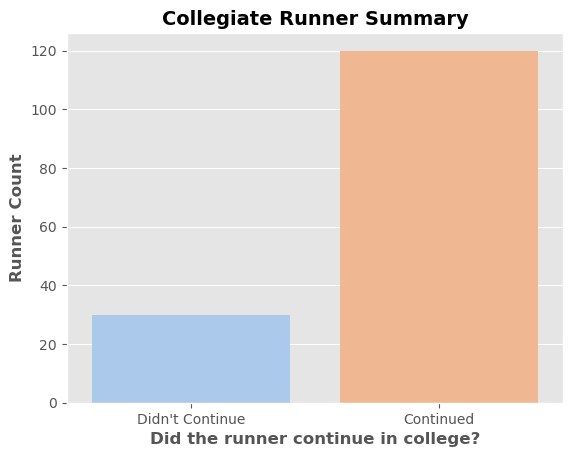

In [59]:
# use a seaborn countplot display the Y Variable showing how many top runners from California ran in college

Y_variable_plot = sns.countplot(data=data_timedelta, x='RUN_IN_COLLEGE_VARSITY?', palette='pastel')
Y_variable_plot.set_xlabel("Did the runner continue in college?", fontsize=12, weight='bold')
Y_variable_plot.set_ylabel("Runner Count", fontsize=12, weight='bold')
Y_variable_plot.set_xticklabels(["Didn't Continue", "Continued"])
Y_variable_plot.set_title("Collegiate Runner Summary", fontsize=14, weight='bold')

# Save the plot to the graph folder
filename = "y_variable_plot.png"
filepath = os.path.join(GRAPH_DIR, filename)
Y_variable_plot.figure.savefig(filepath)

In [60]:
print(data_timedelta[['COLLEGE1_DIV', 'RUN_IN_COLLEGE_VARSITY?']].head(60))




    COLLEGE1_DIV  RUN_IN_COLLEGE_VARSITY?
0              1                     True
1              0                    False
2              1                     True
3              3                     True
4              1                     True
5              3                     True
6              0                    False
7              3                     True
8              1                    False
9              1                     True
10             1                     True
11             1                     True
12             0                    False
13             1                     True
14             1                     True
15             1                     True
16             2                     True
17             2                     True
18             0                    False
19             0                    False
20             0                    False
21             2                     True
22             0                  

In [61]:
# Breakdown by division
div_counts = data_timedelta.groupby('COLLEGE1_DIV').size()
div_percents = div_counts / div_counts.sum() * 100

# Print the breakdown of runners in college by division
div_table = pd.concat([div_counts, div_percents], axis=1)
div_table.columns = ['Number of runners', 'Percentage of runners']
div_table.index.name = 'College Division'
div_table.index = div_table.index.map({0: "D0 (didn't run in college)", 1: "D1", 2: "D2", 3: "D3", 4: "JrColl", 5: "NAIA"})
div_table['Percentage of runners'] = div_table['Percentage of runners'].apply(lambda x: f"{x:.2f}%")
print(div_table)


                            Number of runners Percentage of runners
College Division                                                   
D0 (didn't run in college)                 26                17.33%
D1                                         92                61.33%
D2                                         13                 8.67%
D3                                         10                 6.67%
JrColl                                      5                 3.33%
NAIA                                        4                 2.67%


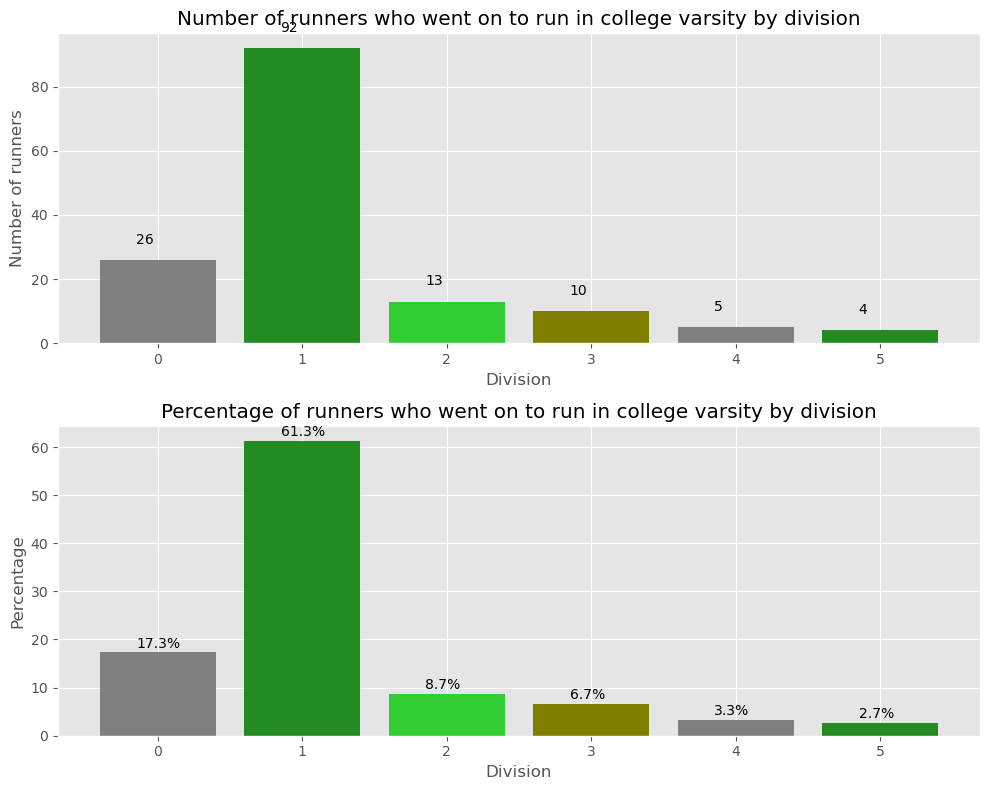

In [62]:
# Graph number and percentage of runners who went on to run in college varsity by division
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
ax1.bar(div_counts.index.astype(str), div_counts.values, color=['grey', 'forestgreen', 'limegreen', 'olive'])
ax1.set_title('Number of runners who went on to run in college varsity by division')
ax1.set_xlabel('Division')
ax1.set_ylabel('Number of runners')
for i, v in enumerate(div_counts.values):
    ax1.text(i - 0.15, v + 5, str(v))
ax2.bar(div_percents.index.astype(str), div_percents.values, color=['grey', 'forestgreen', 'limegreen', 'olive'])
ax2.set_title('Percentage of runners who went on to run in college varsity by division')
ax2.set_xlabel('Division')
ax2.set_ylabel('Percentage')
for i, v in enumerate(div_percents.values):
    ax2.text(i - 0.15, v + 1, f"{v:.1f}%")
plt.tight_layout()


# Save the graphs to the graph foder
fig.savefig(os.path.join(GRAPH_DIR, 'number_of_runners_by_college_division1.png'))
fig.savefig(os.path.join(GRAPH_DIR, 'percentage_of_runners_by_college_division1.png'))

# Show the graphs
plt.show()

In [63]:

# Breakdown by division
div_counts = data_timedelta.groupby('COLLEGE1_DIV')['RUN_IN_COLLEGE_VARSITY?'].sum()
div_percents = div_counts / div_counts.sum() * 100



In [64]:
# Print the breakdown of runners who ran in college
div_table = pd.concat([div_counts, div_percents], axis=1)
div_table.columns = ['Number of runners', 'Percentage of runners']
div_table.index.name = 'College Division'
div_table.index = div_table.index.map({1: "D1", 2: "D2", 3: "D3", 4:"JrColl", 5:"NAIA"})

div_table['Percentage of runners'] = div_table['Percentage of runners'].apply(lambda x: f"{x:.2f}%")
print(div_table)

                  Number of runners Percentage of runners
College Division                                         
NaN                               1                 0.83%
D1                               87                72.50%
D2                               13                10.83%
D3                               10                 8.33%
JrColl                            5                 4.17%
NAIA                              4                 3.33%


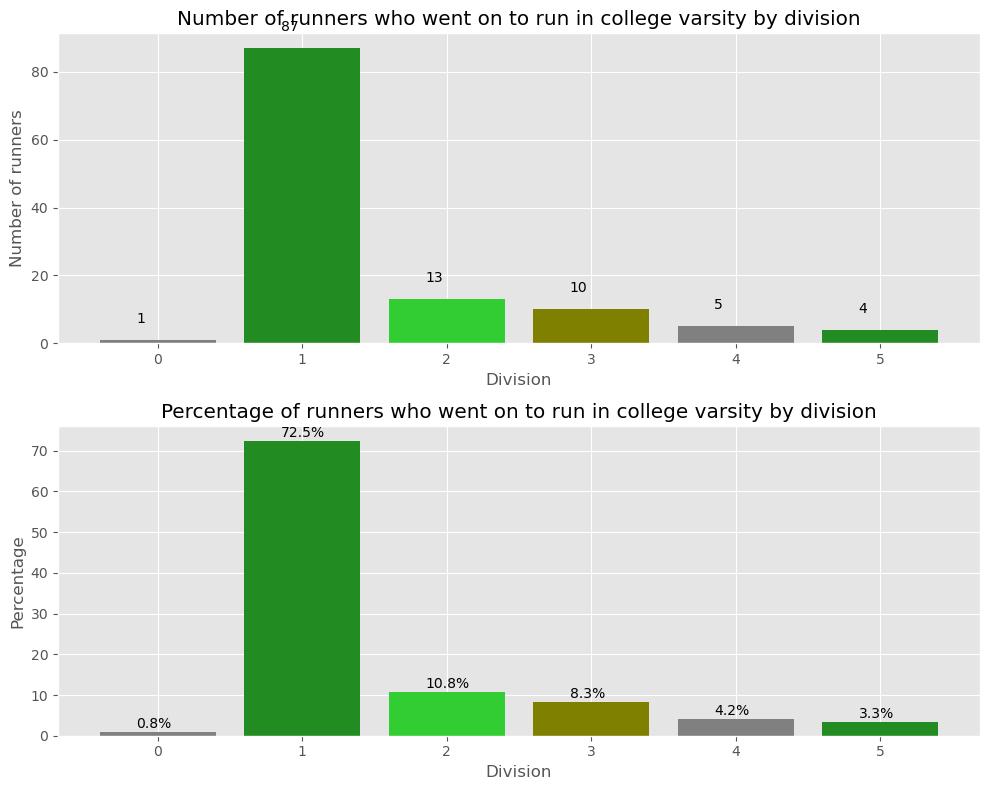

In [65]:
# Graph number and percentage of runners who went on to run in college varsity by division
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
ax1.bar(div_counts.index.astype(str), div_counts.values, color=['grey', 'forestgreen', 'limegreen', 'olive'])
ax1.set_title('Number of runners who went on to run in college varsity by division')
ax1.set_xlabel('Division')
ax1.set_ylabel('Number of runners')
for i, v in enumerate(div_counts.values):
    ax1.text(i - 0.15, v + 5, str(v))
ax2.bar(div_percents.index.astype(str), div_percents.values, color=['grey', 'forestgreen', 'limegreen', 'olive'])
ax2.set_title('Percentage of runners who went on to run in college varsity by division')
ax2.set_xlabel('Division')
ax2.set_ylabel('Percentage')
for i, v in enumerate(div_percents.values):
    ax2.text(i - 0.15, v + 1, f"{v:.1f}%")
plt.tight_layout()


# Save the graphs to the graph foder
fig.savefig(os.path.join(GRAPH_DIR, 'number_of_runners_by_college_division.png'))
fig.savefig(os.path.join(GRAPH_DIR, 'percentage_of_runners_by_college_division.png'))

# Show the graphs
plt.show()


In [66]:

# Breakdown by in-state/out-of-state
state_counts = data_timedelta.groupby('COLL1_OUT_OF_STATE')['RUN_IN_COLLEGE_VARSITY?'].sum()
state_percents = state_counts / state_counts.sum() * 100


In [67]:
# Create table
table = pd.DataFrame({'Counts': state_counts, 'Percentages': state_percents})

# Print table
print(table)

                    Counts  Percentages
COLL1_OUT_OF_STATE                     
False                   77    64.166667
True                    43    35.833333


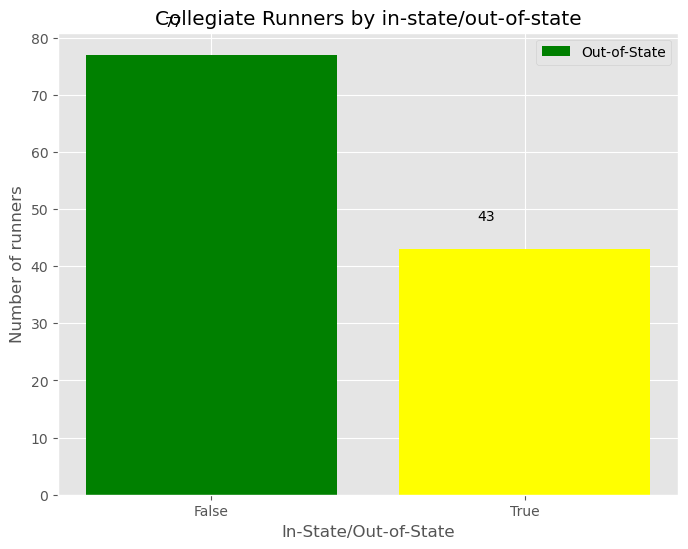

In [68]:
# Graph : Number of runners who went on to run in college varsity by in-state/out-of-state

fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(state_counts.index.astype(str), state_counts.values, color=['green', 'yellow'])
ax.set_title('Collegiate Runners by in-state/out-of-state')
ax.set_xlabel('In-State/Out-of-State')
ax.set_ylabel('Number of runners')
for i, v in enumerate(state_counts.values):
    ax.text(i - 0.15, v + 5, str(v))
ax.legend(['Out-of-State', 'In-State'])
plt.show()

#Save figure
fig.savefig(os.path.join(GRAPH_DIR, 'collegiate_runners_by_state_number.png'))


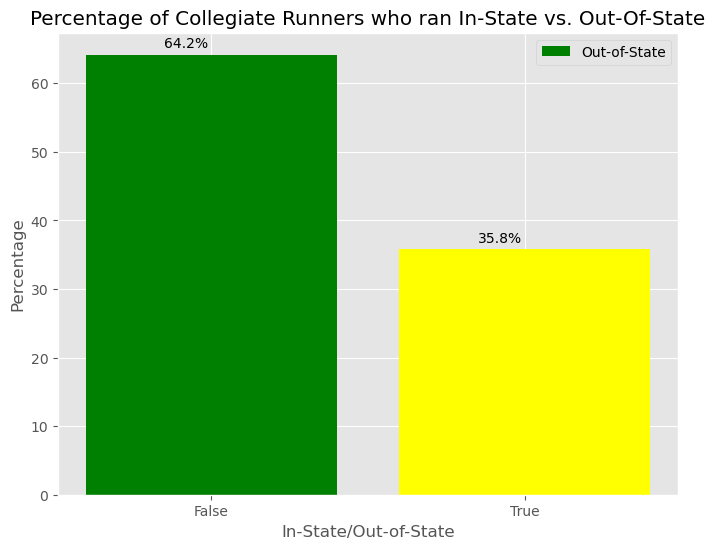

In [69]:
# Graph: Percentage of runners who went on to run in college varsity by in-state/out-of-state

fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(state_percents.index.astype(str), state_percents.values, color=['green', 'yellow'])
ax.set_title('Percentage of Collegiate Runners who ran In-State vs. Out-Of-State')
ax.set_xlabel('In-State/Out-of-State')
ax.set_ylabel('Percentage')
for i, v in enumerate(state_percents.values):
    ax.text(i - 0.15, v + 1, f"{v:.1f}%")
ax.legend(['Out-of-State', 'In-State'])
plt.show()

# Save figure
fig.savefig(os.path.join(GRAPH_DIR, 'collegiate_runners_by_state_percentage.png'))

In [70]:
# The majority of top 2016 California Runners who ran collegiately went Out-Of-State (64.2%)

### NEXT PHASE: Analyze the number of runners who improved their Mile Times from High School to College 

In [71]:
import matplotlib.pyplot as plt

# Calculate the number and percentage of runners who got faster in college
num_faster = data_timedelta['FASTER_MILE'].sum()
pct_faster = num_faster / len(data_timedelta) * 100

# Print the results
print(f"{num_faster} runners ({pct_faster:.1f}%) got faster in the mile in college.")

11 runners (7.3%) got faster in the mile in college.


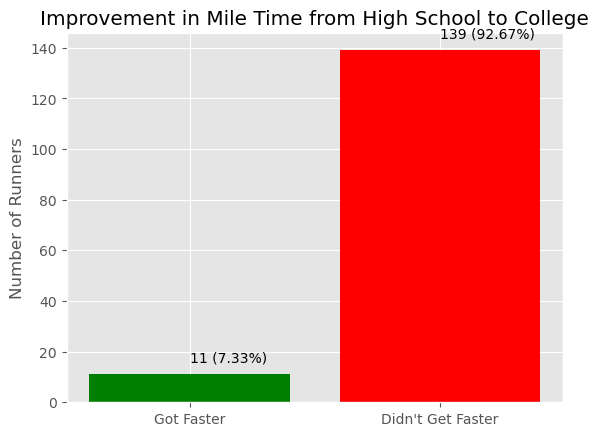

In [72]:
# Display results as a bar graph
fig, ax = plt.subplots()
ax.bar(['Got Faster', "Didn't Get Faster"], [num_faster, len(data_timedelta) - num_faster], 
       color=['green', 'red'])
ax.set_ylabel('Number of Runners')
ax.set_title('Improvement in Mile Time from High School to College')
ax.text(0, num_faster + 5, f'{num_faster} ({pct_faster:.2f}%)')
ax.text(1, len(data_timedelta) - num_faster + 5, f'{len(data_timedelta) - num_faster} ({100 - pct_faster:.2f}%)')


# Save figure
fig.savefig(os.path.join(GRAPH_DIR, 'mile_improvement.png'))

plt.show()


# DATA MODELS 

## PHASE 1 for EARLY DATA EXPLORATION (EDA) 

### SIMPLE REGRESSION MODEL TO PREDICT IF A RUNNER WILL GET FASTER IN THE MILE IN COLLEGE 

In [73]:
#### Reduce the dataframe to just the columns to include in the modeling
modeling_data = data_timedelta.loc[:, ['YEAR', 'DIVISION', 'PLACE', 'FULL_NAME', 
                                       'HS_YR', 'SCHOOL', 'SECTION', 'OVERALL TIME', 
                                       'RUN_IN_COLLEGE_VARSITY?', 'COLLEGE_1', 'COLL1_OUT_OF_STATE', 'COLLEGE1_DIV', 
                                       'BEST_COLLEGE1_8K_XC_TIME', 'BEST_COLLEGE1_5K', 'BEST_COLLEGE1_3K', 
                                       'HS_CALC_MILE', 'COLLEGE1_CALC_MILE', 'FASTER_MILE', 'MILE_IMPROVEMENT']]

In [74]:
print(modeling_data.shape)

(150, 19)


In [75]:
modeling_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype          
---  ------                    --------------  -----          
 0   YEAR                      150 non-null    int64          
 1   DIVISION                  150 non-null    int64          
 2   PLACE                     150 non-null    int64          
 3   FULL_NAME                 150 non-null    object         
 4   HS_YR                     150 non-null    int64          
 5   SCHOOL                    150 non-null    object         
 6   SECTION                   150 non-null    object         
 7   OVERALL TIME              150 non-null    timedelta64[ns]
 8   RUN_IN_COLLEGE_VARSITY?   150 non-null    bool           
 9   COLLEGE_1                 150 non-null    object         
 10  COLL1_OUT_OF_STATE        150 non-null    bool           
 11  COLLEGE1_DIV              150 non-null    int64          
 12  BEST_COL

#### Clean data more for modeling 

In [76]:

# identify columns with timedelta data type
timedelta_cols = modeling_data.select_dtypes(include='timedelta64').columns

# check for integer values in the timedelta columns
#integer_mask = modeling_data[timedelta_cols].applymap(lambda x: isinstance(x, int))

# replace integers with NaN in timedelta columns
#modeling_data[timedelta_cols] = modeling_data[timedelta_cols].replace(integer_mask, np.nan)

# replace NaN with 0 in timedelta columns
#modeling_data[timedelta_cols] = modeling_data[timedelta_cols].fillna(pd.Timedelta(0))

# convert HS_CALC_MILE to numeric (total seconds)
#modeling_data['HS_CALC_MILE'] = pd.to_numeric(modeling_data['HS_CALC_MILE'], errors='coerce')

# drop any rows with missing values
# modeling_data.dropna(inplace=True)





In [77]:
# Keep only the data rows that have been filled out with college data
modeling_data = modeling_data.head(150)

In [78]:
# drop columns that aren't used in regression for now
#modeling_data.drop('FULL_NAME', axis=1, inplace=True)


In [79]:
# fill any remaining missing values with 0
#modeling_data.fillna(0, inplace=True)

In [80]:
# convert categorical variables (SCHOOL and SECTION) to numeric using one-hot encoding
modeling_data = pd.get_dummies(modeling_data, columns=['SCHOOL', 'SECTION'])

In [81]:
modeling_data

,YEAR,DIVISION,PLACE,FULL_NAME,HS_YR,OVERALL TIME,RUN_IN_COLLEGE_VARSITY?,COLLEGE_1,COLL1_OUT_OF_STATE,COLLEGE1_DIV,...,SCHOOL_Whittier Christian,SCHOOL_Woodcrest Christian,SECTION_CCS,SECTION_CS,SECTION_LAS,SECTION_NCS,SECTION_NS,SECTION_SDS,SECTION_SJS,SECTION_SS
0,2016,4,1,Callum Bolger,4,0 days 00:14:57.000004,True,Stanford,False,1,...,0,0,0,0,0,0,0,0,0,1
1,2016,4,2,Jared Rodriguez,4,0 days 00:15:29.000003,False,unknown,False,0,...,0,0,0,0,0,0,0,0,0,1
2,2016,4,3,Joseph Garcia,4,0 days 00:15:33.000009,True,Loyola Marymount,False,1,...,0,0,0,0,0,0,0,0,0,1
3,2016,4,4,Ryan Cutter,4,0 days 00:15:39.000009,True,University of Chicago,True,3,...,0,0,0,0,0,1,0,0,0,0
4,2016,4,5,Anthony Grover,1,0 days 00:15:40.000001,True,Wake Forest,True,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,2016,3,26,Finn Waters,3,0 days 00:15:51.000006,True,Columbia,True,1,...,0,0,0,0,0,0,0,1,0,0
146,2016,3,27,Andrew Hazzard,3,0 days 00:15:52.000005,False,Chico State (for soccer),False,1,...,0,0,0,0,0,0,0,0,0,1
147,2016,3,28,Michael Robinson,4,0 days 00:15:52.000008,False,unknown,False,0,...,0,0,0,0,0,0,0,1,0,0
148,2016,3,29,Alberto Lopez,2,0 days 00:15:52.000009,False,unknown,False,0,...,0,0,0,0,0,0,0,0,0,1


In [82]:
print(modeling_data.shape)

(150, 128)


In [83]:
# Define X independent variables to be: DIVISION, PLACE, HS_YR, SECTION, OVERALL TIME, HS_CALC_MILE 
         
modeling_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Columns: 128 entries, YEAR to SECTION_SS
dtypes: bool(2), int64(6), object(2), timedelta64[ns](7), uint8(111)
memory usage: 34.3+ KB


In [84]:
# split the data into training and testing sets
cols_to_drop = ['YEAR','FULL_NAME', 'RUN_IN_COLLEGE_VARSITY?', 'COLLEGE_1', 'COLL1_OUT_OF_STATE', 'COLLEGE1_DIV', 'BEST_COLLEGE1_8K_XC_TIME', 'BEST_COLLEGE1_5K', 'BEST_COLLEGE1_3K', 'COLLEGE1_CALC_MILE', 'FASTER_MILE', 'MILE_IMPROVEMENT']
X = modeling_data.drop(cols_to_drop, axis=1)
X['HS_CALC_MILE'] = X['HS_CALC_MILE'].fillna(pd.Timedelta(seconds=0))
y = modeling_data['RUN_IN_COLLEGE_VARSITY?']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [85]:
print(X)

     DIVISION  PLACE  HS_YR           OVERALL TIME           HS_CALC_MILE  \
0           4      1      4 0 days 00:14:57.000004 0 days 00:04:05.000006   
1           4      2      4 0 days 00:15:29.000003        0 days 00:00:00   
2           4      3      4 0 days 00:15:33.000009        0 days 00:00:00   
3           4      4      4 0 days 00:15:39.000009 0 days 00:04:07.000004   
4           4      5      1 0 days 00:15:40.000001 0 days 00:04:11.500006   
..        ...    ...    ...                    ...                    ...   
145         3     26      3 0 days 00:15:51.000006        0 days 00:00:00   
146         3     27      3 0 days 00:15:52.000005        0 days 00:00:00   
147         3     28      4 0 days 00:15:52.000008        0 days 00:00:00   
148         3     29      2 0 days 00:15:52.000009        0 days 00:00:00   
149         3     30      4 0 days 00:15:53.000006        0 days 00:00:00   

     SCHOOL_Arcata  SCHOOL_Armijo  SCHOOL_Arroyo Grande  SCHOOL_Ayala  \
0 

NOTE: The columns OVERALL TIME and HS_CALC_MILE are Timedelta objects which cannot be converted to float values required by LinearRegression. Convert to numerical values before training the model. b

In [86]:
# convert timedelta columns to numerical values
X_train['OVERALL TIME'] = X_train['OVERALL TIME'].apply(lambda x: x.total_seconds())
X_train['HS_CALC_MILE'] = X_train['HS_CALC_MILE'].apply(lambda x: x.total_seconds() / 60)

X_test['OVERALL TIME'] = X_test['OVERALL TIME'].apply(lambda x: x.total_seconds())
X_test['HS_CALC_MILE'] = X_test['HS_CALC_MILE'].apply(lambda x: x.total_seconds() / 60)



In [87]:

# create and train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# make predictions on the test set and calculate accuracy score
y_pred = lr_model.predict(X_test)
y_pred = [1 if x > 0.5 else 0 for x in y_pred] # convert probabilities to binary predictions
accuracy = accuracy_score(y_test, y_pred)


print('Accuracy:', accuracy)


Accuracy: 0.5666666666666667


In [88]:

# add predictions as a column to modeling_data
#modeling_data['LR_PRED1'] = y_pred

In [89]:

# create a dataframe with X_test, y_test, and y_pred values
lr_model_results = pd.DataFrame({'X': X_test.iloc[:, 0], 'y_true': y_test, 'y_pred': y_pred})
print(lr_model_results)

     X  y_true  y_pred
73   1    True       1
18   4   False       1
118  2    True       1
78   1    True       1
76   1    True       1
31   5    True       0
64   1    True       1
141  3    True       1
68   1    True       1
82   1   False       1
110  2   False       1
12   4   False       1
36   5    True       1
9    4    True       1
19   4   False       1
56   5    True       1
104  2    True       1
69   1    True       1
55   5    True       1
132  3    True       1
29   4   False       1
127  3    True       0
26   4   False       1
128  3    True       1
131  3    True       1
145  3    True       0
108  2    True       0
143  3    True       1
45   5   False       1
30   5    True       0


In [151]:
# a preliminary linear regression model seemed to get 56.7% accuracy

### PHASE 1: Enhanced Linear Regression Pipeline for Preliminary EDA 

Create a modeling pipeline using a constant to fill in missing values with a mean, a standard scaler to scale the features, a feature selector to choose the top k features, and a linear regression model. 

In [91]:
# define the pipeline
pipeline = Pipeline([
    #('imputer', SimpleImputer(strategy='constant', fill_value=0)), # fill missing values with 0
    ('scaler', StandardScaler()),
    ('feature_selection', SelectKBest()),
    ('regression', LinearRegression())
])

In [92]:
# define the hyperparameter space to search over
param_grid = {
    'feature_selection__k': [5, 10, 15],
    'regression__fit_intercept': [True, False],
}

Use grid search to search over a range of hyperparameters for the feature selection and regression steps. 

In [93]:
# perform grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 11  12  15  16  17  24  30  33  38  39  41  43  44  45  47  54  57  58
  62  65  67  70  71  73  81  82  83  85  87  90  91  92  94 104] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [  6   7  10  11  15  17  18  24  30  37  38  45  46  52  54  58  62  65
  67  68  71  73  75  83  84  85  87  90  95  97 101 105] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid v

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('feature_selection', SelectKBest()),
                                       ('regression', LinearRegression())]),
             param_grid={'feature_selection__k': [5, 10, 15],
                         'regression__fit_intercept': [True, False]})

In [94]:
# Assuming X is your dataset
#for i in range(X.shape[1]):
#    unique_vals = np.unique(X[:, i])
 #   if len(unique_vals) == 1:
   #     print(f"Feature {i} is constant with value {unique_vals[0]}")

Make predictions on the test set and calculate the accuracy score.


In [95]:
# make predictions on the test set and calculate accuracy score
y_pred = grid_search.predict(X_test)
y_pred = [1 if x > 0.5 else 0 for x in y_pred] # convert probabilities to binary predictions
accuracy = accuracy_score(y_test, y_pred)

In [96]:
print('Best hyperparameters:', grid_search.best_params_)
print('Accuracy:', accuracy)

Best hyperparameters: {'feature_selection__k': 5, 'regression__fit_intercept': True}
Accuracy: 0.6666666666666666


In [152]:
# Enhanced simple linear regression has 66.7% accuracy

### FUTURE: MODEL TO PREDICT IF A RUNNER WILL GET FASTER IN THE MILE IN COLLEGE 


Note: since this is really a classification problem of which runners run in college, which runners improve, which division the runners run at then using classification modeling is recommended 

### PHASE 1: Logistic Regression Pipeline - Predicting if a HS Runner will continue running in College

In [97]:
# Try building a Logistic Regression model with the data to see how it performs 

In [98]:
# Note: lesson learned with a small dataset using only .2 for test data was not enough - results improved 
# when test_size was increased to .4 across the models 

In [99]:
# split the data into training and testing sets (same code for all models tried)
cols_to_drop = ['YEAR','FULL_NAME', 'RUN_IN_COLLEGE_VARSITY?', 'COLLEGE_1', 'COLL1_OUT_OF_STATE', 'COLLEGE1_DIV', 'BEST_COLLEGE1_8K_XC_TIME', 'BEST_COLLEGE1_5K', 'BEST_COLLEGE1_3K', 'COLLEGE1_CALC_MILE', 'FASTER_MILE', 'MILE_IMPROVEMENT']
X = modeling_data.drop(cols_to_drop, axis=1)
X['HS_CALC_MILE'] = X['HS_CALC_MILE'].fillna(pd.Timedelta(seconds=0))
y = modeling_data['RUN_IN_COLLEGE_VARSITY?']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


In [100]:
print (X)

     DIVISION  PLACE  HS_YR           OVERALL TIME           HS_CALC_MILE  \
0           4      1      4 0 days 00:14:57.000004 0 days 00:04:05.000006   
1           4      2      4 0 days 00:15:29.000003        0 days 00:00:00   
2           4      3      4 0 days 00:15:33.000009        0 days 00:00:00   
3           4      4      4 0 days 00:15:39.000009 0 days 00:04:07.000004   
4           4      5      1 0 days 00:15:40.000001 0 days 00:04:11.500006   
..        ...    ...    ...                    ...                    ...   
145         3     26      3 0 days 00:15:51.000006        0 days 00:00:00   
146         3     27      3 0 days 00:15:52.000005        0 days 00:00:00   
147         3     28      4 0 days 00:15:52.000008        0 days 00:00:00   
148         3     29      2 0 days 00:15:52.000009        0 days 00:00:00   
149         3     30      4 0 days 00:15:53.000006        0 days 00:00:00   

     SCHOOL_Arcata  SCHOOL_Armijo  SCHOOL_Arroyo Grande  SCHOOL_Ayala  \
0 

In [101]:
print(y_test)

73      True
18     False
118     True
78      True
76      True
31      True
64      True
141     True
68      True
82     False
110    False
12     False
36      True
9       True
19     False
56      True
104     True
69      True
55      True
132     True
29     False
127     True
26     False
128     True
131     True
145     True
108     True
143     True
45     False
30      True
22     False
15      True
65      True
11      True
42     False
146    False
51     False
27      True
4       True
32      True
142     True
85     False
86     False
16      True
10      True
81      True
133     True
137    False
75      True
109     True
96      True
105     True
66      True
0       True
122     True
67      True
28      True
40      True
44     False
60      True
Name: RUN_IN_COLLEGE_VARSITY?, dtype: bool


In [102]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 150 entries, 0 to 149
Series name: RUN_IN_COLLEGE_VARSITY?
Non-Null Count  Dtype
--------------  -----
150 non-null    bool 
dtypes: bool(1)
memory usage: 278.0 bytes


In [103]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Columns: 116 entries, DIVISION to SECTION_SS
dtypes: int64(3), timedelta64[ns](2), uint8(111)
memory usage: 22.2 KB


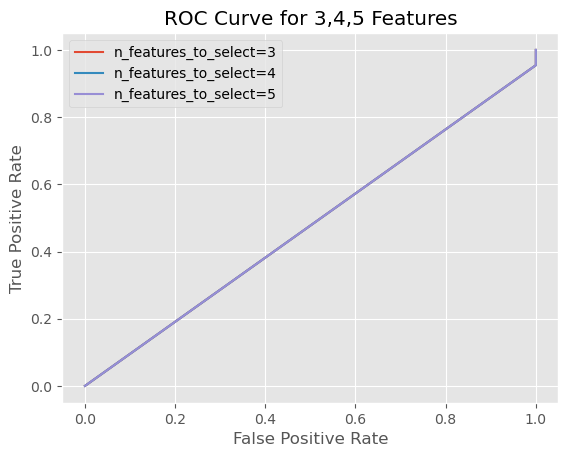

Best model:
Pipeline(steps=[('scaler', StandardScaler()),
                ('rfe',
                 RFE(estimator=LogisticRegression(max_iter=1000),
                     n_features_to_select=5)),
                ('classifier', LogisticRegression(max_iter=1000))])
Score: 0.5886363636363636


<Figure size 640x480 with 0 Axes>

In [104]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Preprocess training data
X_train_preprocessed = X_train.copy()
X_train_preprocessed['OVERALL TIME'] = pd.to_timedelta(X_train_preprocessed['OVERALL TIME']).dt.total_seconds()
X_train_preprocessed['HS_CALC_MILE'] = pd.to_timedelta(X_train_preprocessed['HS_CALC_MILE']).dt.total_seconds()

# Preprocess testing data
X_test_preprocessed = X_test.copy()
X_test_preprocessed['OVERALL TIME'] = pd.to_timedelta(X_test_preprocessed['OVERALL TIME']).dt.total_seconds()
X_test_preprocessed['HS_CALC_MILE'] = pd.to_timedelta(X_test_preprocessed['HS_CALC_MILE']).dt.total_seconds()

# Define the pipeline to first scale the data, then use Recursive Feature Selection to reduce the number of features
# then apply the logistic regression classifier to the model
lr_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('rfe', RFE(estimator=LogisticRegression(max_iter=1000))),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Define the number of features to evaluate
n_features_to_select = [3, 4, 5]

# Initialize empty lists for storing accuracy and AUC scores
accuracy_scores = []
auc_scores = []

# Loop through each number of features
best_model = None
best_score = 0
for n in n_features_to_select:
    # Set the number of features for RFE
    lr_pipe.named_steps['rfe'].n_features_to_select = n

    # Fit the pipeline and get accuracy score
    lr_pipe.fit(X_train_preprocessed, y_train)
    y_pred = lr_pipe.predict(X_test_preprocessed)
    acc_score = accuracy_score(y_test, y_pred)

    # Get AUC score
    y_pred_proba = lr_pipe.predict_proba(X_test_preprocessed)[:, 1]
    auc_score = roc_auc_score(y_test, y_pred_proba)

    # Get ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'n_features_to_select={n}')

    # Calculate and store accuracy and AUC scores
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    auc_scores.append(roc_auc_score(y_test, y_pred_proba))

    # Check if this is the best model so far
    avg_score = (acc_score + auc_score) / 2
    if avg_score > best_score:
        best_score = avg_score
        best_model = lr_pipe


# Show ROC curve
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title("ROC Curve for 3,4,5 Features")
plt.show()
plt.savefig("LogisticRegression ROC Curve.png")

# Print the best model and its score
print('Best model:')
print(best_model)
print(f'Score: {best_score}')

## Logistic Regression model gives an accuracy of 58.8% accuracy

In [105]:
# Create a table with predicted and actual values
results_lr = pd.DataFrame({'Predicted': y_pred, 'Actual': y_test})

# Merge with the "FULL_NAME" column from the original dataframe
results_merged = pd.concat([modeling_data[['FULL_NAME']], results_lr], axis=1)

# Print the merged table
print(results_merged)

            FULL_NAME Predicted Actual
0       Callum Bolger      True   True
1     Jared Rodriguez       NaN    NaN
2       Joseph Garcia       NaN    NaN
3         Ryan Cutter       NaN    NaN
4      Anthony Grover      True   True
..                ...       ...    ...
145       Finn Waters     False   True
146    Andrew Hazzard      True  False
147  Michael Robinson       NaN    NaN
148     Alberto Lopez       NaN    NaN
149     Uriel Mercado       NaN    NaN

[150 rows x 3 columns]


In [106]:
results_lr

,Predicted,Actual
73,True,True
18,True,False
118,True,True
78,True,True
76,True,True
31,True,True
64,True,True
141,True,True
68,True,True
82,True,False


   ## Decision Tree MODELS
   

## Decision Tree Model with Scaling - Phase 1- Will the runner continue in college?

In [107]:
# split the data into training and testing sets (same code for all models tried)
cols_to_drop = ['YEAR','FULL_NAME', 'RUN_IN_COLLEGE_VARSITY?', 'COLLEGE_1', 'COLL1_OUT_OF_STATE', 'COLLEGE1_DIV', 'BEST_COLLEGE1_8K_XC_TIME', 'BEST_COLLEGE1_5K', 'BEST_COLLEGE1_3K', 'COLLEGE1_CALC_MILE', 'FASTER_MILE', 'MILE_IMPROVEMENT']
X = modeling_data.drop(cols_to_drop, axis=1)
X['HS_CALC_MILE'] = X['HS_CALC_MILE'].fillna(pd.Timedelta(seconds=0))
y = modeling_data['RUN_IN_COLLEGE_VARSITY?']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


   n_features_selected  accuracy       auc  avg_score
0                    3  0.666667  0.502841   0.584754
1                    4  0.666667  0.502841   0.584754
2                   10  0.700000  0.486506   0.593253


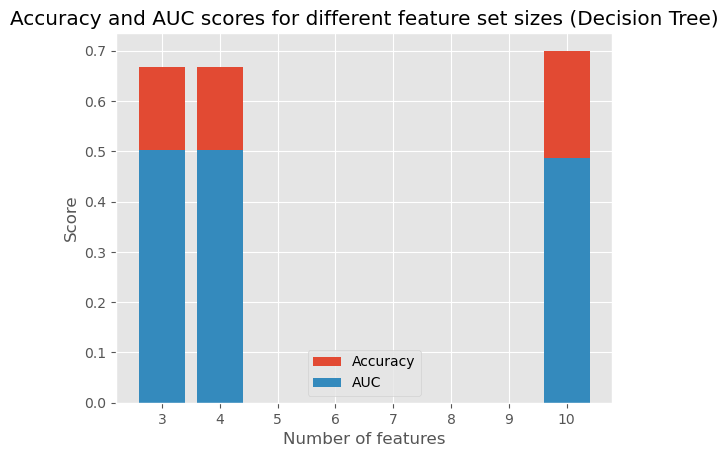

In [108]:
import pandas as pd
from datetime import timedelta

# Preprocess data to convert "OVERALL TIME" and "HS_CALC_MILE" columns to seconds
X_train_preprocessed = X_train.copy()
X_train_preprocessed['OVERALL TIME'] = pd.to_timedelta(X_train_preprocessed['OVERALL TIME']).dt.total_seconds()
X_train_preprocessed['HS_CALC_MILE'] = pd.to_timedelta(X_train_preprocessed['HS_CALC_MILE']).dt.total_seconds()

X_test_preprocessed = X_test.copy()
X_test_preprocessed['OVERALL TIME'] = pd.to_timedelta(X_test_preprocessed['OVERALL TIME']).dt.total_seconds()
X_test_preprocessed['HS_CALC_MILE'] = pd.to_timedelta(X_test_preprocessed['HS_CALC_MILE']).dt.total_seconds()

# Define the pipeline to first scale the data, then use Recursive Feature Selection to reduce the number of features
# then apply the decision tree classifier to the model
pipe_dt = Pipeline([
    ('scaler', StandardScaler()),
    ('rfe', RFE(estimator=DecisionTreeClassifier())),
    ('classifier', DecisionTreeClassifier())
])

# Define the number of features to evaluate
n_features_to_select = [3, 4, 10]

# Initialize empty lists for storing accuracy and AUC scores
accuracy_scores_dt = []
auc_scores_dt = []

# Loop through each number of features
for n in n_features_to_select:
    # Set the number of features for RFE
    pipe_dt.named_steps['rfe'].n_features_to_select = n

    # Fit the pipeline and get accuracy score
    pipe_dt.fit(X_train_preprocessed, y_train)
    y_pred = pipe_dt.predict(X_test_preprocessed)
    acc_score = accuracy_score(y_test, y_pred)

    # Get AUC score
    y_pred_proba = pipe_dt.predict_proba(X_test_preprocessed)[:, 1]
    auc_score = roc_auc_score(y_test, y_pred_proba)

    # Calculate and store accuracy and AUC scores
    accuracy_scores_dt.append(acc_score)
    auc_scores_dt.append(auc_score)

# Create dataframe of scores
scores_dt = pd.DataFrame({
    'n_features_selected': n_features_to_select,
    'accuracy': accuracy_scores_dt,
    'auc': auc_scores_dt
})

# Add a column for the average of accuracy and AUC scores
scores_dt['avg_score'] = (scores_dt['accuracy'] + scores_dt['auc']) / 2

# Print the data
print(scores_dt)

# Create bar chart of scores
fig, ax = plt.subplots()

ax.bar(n_features_to_select, accuracy_scores_dt, label='Accuracy')
ax.bar(n_features_to_select, auc_scores_dt, label='AUC')

ax.set_xlabel('Number of features')
ax.set_ylabel('Score')
ax.set_title('Accuracy and AUC scores for different feature set sizes (Decision Tree)')
ax.legend()

# Save the plot
plt.savefig('decision_tree_scores.png')

plt.show()


## Decision Tree Model produced an accuracy of 59.3% (with 10 features selected giving best results)

In [109]:
# Create a table with predicted and actual values
results_dt = pd.DataFrame({'Predicted': y_pred, 'Actual': y_test})

# Merge with the "FULL_NAME" column from the original dataframe
results_merged = pd.concat([modeling_data[['FULL_NAME']], results_dt], axis=1)

# Print the merged table
print(results_merged)

            FULL_NAME Predicted Actual
0       Callum Bolger      True   True
1     Jared Rodriguez       NaN    NaN
2       Joseph Garcia       NaN    NaN
3         Ryan Cutter       NaN    NaN
4      Anthony Grover      True   True
..                ...       ...    ...
145       Finn Waters     False   True
146    Andrew Hazzard      True  False
147  Michael Robinson       NaN    NaN
148     Alberto Lopez       NaN    NaN
149     Uriel Mercado       NaN    NaN

[150 rows x 3 columns]


In [110]:
print(modeling_data)

     YEAR  DIVISION  PLACE         FULL_NAME  HS_YR           OVERALL TIME  \
0    2016         4      1     Callum Bolger      4 0 days 00:14:57.000004   
1    2016         4      2   Jared Rodriguez      4 0 days 00:15:29.000003   
2    2016         4      3     Joseph Garcia      4 0 days 00:15:33.000009   
3    2016         4      4       Ryan Cutter      4 0 days 00:15:39.000009   
4    2016         4      5    Anthony Grover      1 0 days 00:15:40.000001   
..    ...       ...    ...               ...    ...                    ...   
145  2016         3     26       Finn Waters      3 0 days 00:15:51.000006   
146  2016         3     27    Andrew Hazzard      3 0 days 00:15:52.000005   
147  2016         3     28  Michael Robinson      4 0 days 00:15:52.000008   
148  2016         3     29     Alberto Lopez      2 0 days 00:15:52.000009   
149  2016         3     30     Uriel Mercado      4 0 days 00:15:53.000006   

     RUN_IN_COLLEGE_VARSITY?                 COLLEGE_1  COLL1_O

In [111]:
results_dt

,Predicted,Actual
73,True,True
18,False,False
118,True,True
78,True,True
76,True,True
31,True,True
64,True,True
141,True,True
68,True,True
82,True,False


In [112]:
# Print the decision tree information
print("Decision Tree Information:")


Decision Tree Information:


In [113]:
print(pipe_dt.named_steps['classifier'])

DecisionTreeClassifier()


Decision Tree Model Summary
---------------------------


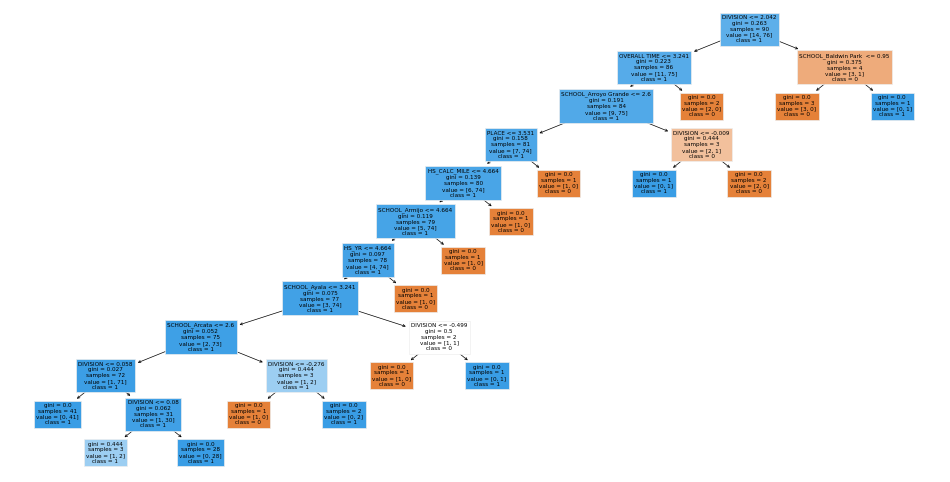

In [114]:
from sklearn.tree import export_text

# Generate the text representation of the decision tree
#tree_text = export_text(pipe_dt.named_steps['classifier'], feature_names=list(X_train_preprocessed.columns))

# Print the decision tree summary with a title
print('Decision Tree Model Summary')
print('---------------------------')
#print(tree_text)

# Plot the decision tree with a title
plt.figure(figsize=(12, 6))
plt.title('Decision Tree Model', fontsize=16, fontweight='bold')
plot_tree(pipe_dt.named_steps['classifier'], feature_names=X_train_preprocessed.columns, class_names=['0', '1'], filled=True)
plt.savefig("decision_tree.png")
plt.show()

In [115]:
# Fit the pipeline
pipe_dt.fit(X_train_preprocessed, y_train)

# Get the decision tree model from the pipeline
dt_model = pipe_dt.named_steps['classifier']

# Set the maximum depth to 5
dt_model.set_params(max_depth=5)

DecisionTreeClassifier(max_depth=5)

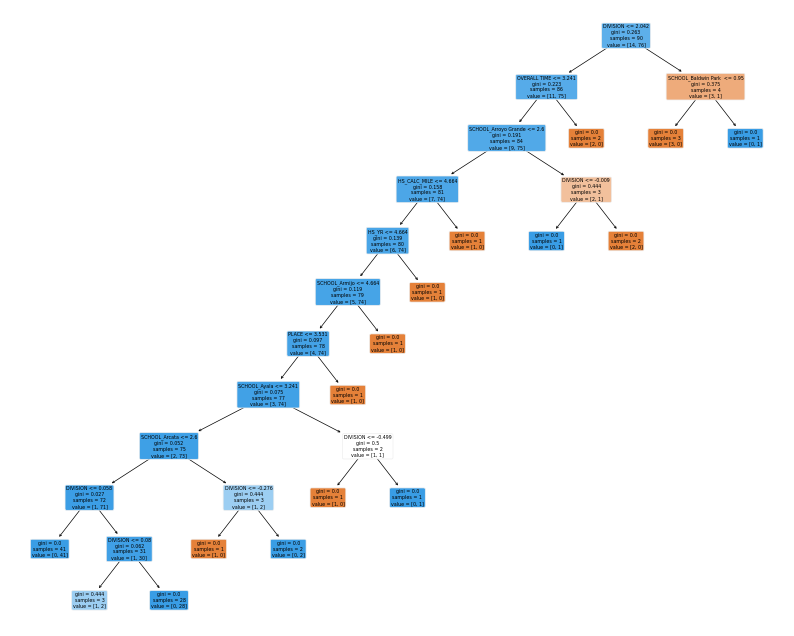

In [116]:
# Plot the decision tree
fig = plt.figure(figsize=(10, 8))
_ = tree.plot_tree(dt_model, feature_names=X_train_preprocessed.columns[:n], filled=True, rounded=True)
plt.savefig('decision_tree0.png')
plt.show()

In [117]:
# Print the decision tree as text
text_representation = tree.export_text(dt_model, feature_names=X_train_preprocessed.columns[:n].tolist())
print(text_representation)



|--- DIVISION <= 2.04
|   |--- OVERALL TIME <= 3.24
|   |   |--- SCHOOL_Arroyo Grande <= 2.60
|   |   |   |--- HS_CALC_MILE <= 4.66
|   |   |   |   |--- HS_YR <= 4.66
|   |   |   |   |   |--- SCHOOL_Armijo <= 4.66
|   |   |   |   |   |   |--- PLACE <= 3.53
|   |   |   |   |   |   |   |--- SCHOOL_Ayala <= 3.24
|   |   |   |   |   |   |   |   |--- SCHOOL_Arcata <= 2.60
|   |   |   |   |   |   |   |   |   |--- DIVISION <= 0.06
|   |   |   |   |   |   |   |   |   |   |--- class: True
|   |   |   |   |   |   |   |   |   |--- DIVISION >  0.06
|   |   |   |   |   |   |   |   |   |   |--- DIVISION <= 0.08
|   |   |   |   |   |   |   |   |   |   |   |--- class: True
|   |   |   |   |   |   |   |   |   |   |--- DIVISION >  0.08
|   |   |   |   |   |   |   |   |   |   |   |--- class: True
|   |   |   |   |   |   |   |   |--- SCHOOL_Arcata >  2.60
|   |   |   |   |   |   |   |   |   |--- DIVISION <= -0.28
|   |   |   |   |   |   |   |   |   |   |--- class: False
|   |   |   |   |   |   |   |   |  

In [153]:
# Results from from Decision Tree modeling show
# Division the runner ran in is the most important factor 

## DECISION TREE MODEL without Scaling 

In [119]:
# split the data into training and testing sets (same code for all models tried)
cols_to_drop = ['YEAR','FULL_NAME', 'RUN_IN_COLLEGE_VARSITY?', 'COLLEGE_1', 'COLL1_OUT_OF_STATE', 'COLLEGE1_DIV', 'BEST_COLLEGE1_8K_XC_TIME', 'BEST_COLLEGE1_5K', 'BEST_COLLEGE1_3K', 'COLLEGE1_CALC_MILE', 'FASTER_MILE', 'MILE_IMPROVEMENT']
X = modeling_data.drop(cols_to_drop, axis=1)
X['HS_CALC_MILE'] = X['HS_CALC_MILE'].fillna(pd.Timedelta(seconds=0))
y = modeling_data['RUN_IN_COLLEGE_VARSITY?']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

   n_features_selected  accuracy       auc  avg_score
0                    3       0.7  0.486506   0.593253
1                    4       0.7  0.486506   0.593253
2                   10       0.7  0.486506   0.593253


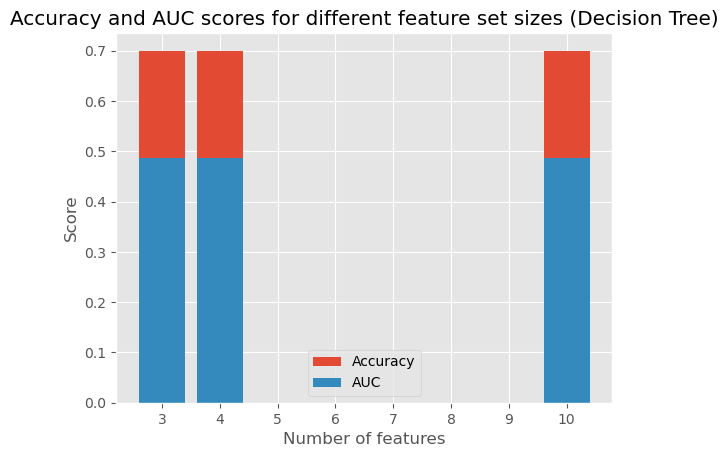

In [120]:
import pandas as pd
from datetime import timedelta

# Preprocess data to convert "OVERALL TIME" and "HS_CALC_MILE" columns to seconds
X_train_preprocessed = X_train.copy()
X_train_preprocessed['OVERALL TIME'] = pd.to_timedelta(X_train_preprocessed['OVERALL TIME']).dt.total_seconds()
X_train_preprocessed['HS_CALC_MILE'] = pd.to_timedelta(X_train_preprocessed['HS_CALC_MILE']).dt.total_seconds()

X_test_preprocessed = X_test.copy()
X_test_preprocessed['OVERALL TIME'] = pd.to_timedelta(X_test_preprocessed['OVERALL TIME']).dt.total_seconds()
X_test_preprocessed['HS_CALC_MILE'] = pd.to_timedelta(X_test_preprocessed['HS_CALC_MILE']).dt.total_seconds()

# Define the pipeline to first scale the data, then use Recursive Feature Selection to reduce the number of features
# then apply the decision tree classifier to the model
pipe_dt2 = Pipeline([
    ('rfe', RFE(estimator=DecisionTreeClassifier())),
    ('classifier', DecisionTreeClassifier())
])

# Define the number of features to evaluate
n_features_to_select = [3, 4, 10]

# Initialize empty lists for storing accuracy and AUC scores
accuracy_scores_dt2 = []
auc_scores_dt2 = []

# Loop through each number of features
for n in n_features_to_select:
    # Set the number of features for RFE
    pipe_dt2.named_steps['rfe'].n_features_to_select = n

    # Fit the pipeline and get accuracy score
    pipe_dt2.fit(X_train_preprocessed, y_train)
    y_pred2 = pipe_dt2.predict(X_test_preprocessed)
    acc_score2 = accuracy_score(y_test, y_pred)

    # Get AUC score
    y_pred_proba2 = pipe_dt2.predict_proba(X_test_preprocessed)[:, 1]
    auc_score2 = roc_auc_score(y_test, y_pred_proba)

    # Calculate and store accuracy and AUC scores
    accuracy_scores_dt2.append(acc_score2)
    auc_scores_dt2.append(auc_score2)

# Create dataframe of scores
scores_dt2 = pd.DataFrame({
    'n_features_selected': n_features_to_select,
    'accuracy': accuracy_scores_dt2,
    'auc': auc_scores_dt2
})

# Add a column for the average of accuracy and AUC scores
scores_dt2['avg_score'] = (scores_dt2['accuracy'] + scores_dt2['auc']) / 2

# Print the data
print(scores_dt2)

# Create bar chart of scores
fig, ax = plt.subplots()

ax.bar(n_features_to_select, accuracy_scores_dt2, label='Accuracy')
ax.bar(n_features_to_select, auc_scores_dt2, label='AUC')

ax.set_xlabel('Number of features')
ax.set_ylabel('Score')
ax.set_title('Accuracy and AUC scores for different feature set sizes (Decision Tree)')
ax.legend()

# Save the plot
plt.savefig('decision_tree_scores2.png')

plt.show()


In [121]:
# Fit the pipeline
pipe_dt2.fit(X_train_preprocessed, y_train)

# Get the decision tree model from the pipeline
dt_model2 = pipe_dt.named_steps['classifier']

# Set the maximum depth to 5
dt_model2.set_params(max_depth=5)

DecisionTreeClassifier(max_depth=5)

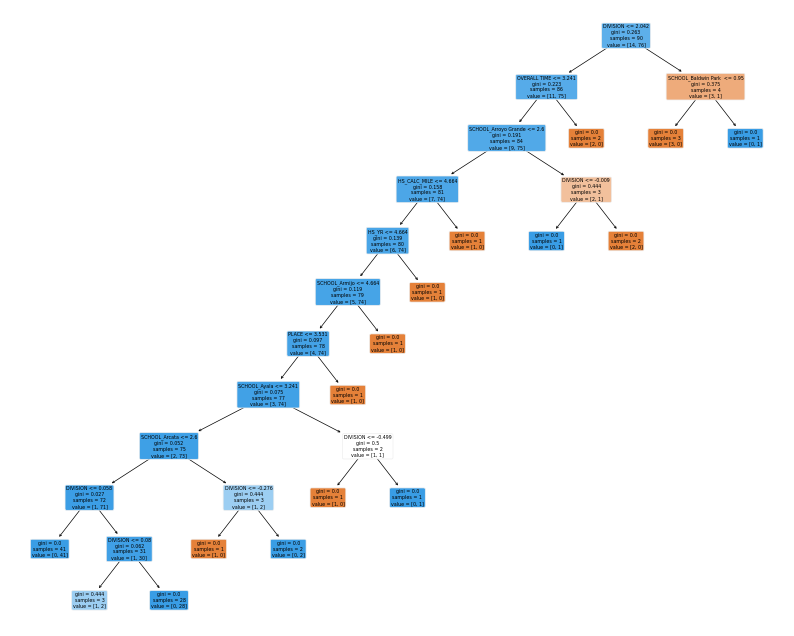

In [122]:
# Plot the decision tree
fig = plt.figure(figsize=(10, 8))
_ = tree.plot_tree(dt_model2, feature_names=X_train_preprocessed.columns[:n], filled=True, rounded=True)
plt.savefig('decision_tree2.png')
plt.show()

In [123]:
# Print the decision tree as text
text_representation = tree.export_text(dt_model2, feature_names=X_train_preprocessed.columns[:n].tolist())
print(text_representation)


|--- DIVISION <= 2.04
|   |--- OVERALL TIME <= 3.24
|   |   |--- SCHOOL_Arroyo Grande <= 2.60
|   |   |   |--- HS_CALC_MILE <= 4.66
|   |   |   |   |--- HS_YR <= 4.66
|   |   |   |   |   |--- SCHOOL_Armijo <= 4.66
|   |   |   |   |   |   |--- PLACE <= 3.53
|   |   |   |   |   |   |   |--- SCHOOL_Ayala <= 3.24
|   |   |   |   |   |   |   |   |--- SCHOOL_Arcata <= 2.60
|   |   |   |   |   |   |   |   |   |--- DIVISION <= 0.06
|   |   |   |   |   |   |   |   |   |   |--- class: True
|   |   |   |   |   |   |   |   |   |--- DIVISION >  0.06
|   |   |   |   |   |   |   |   |   |   |--- DIVISION <= 0.08
|   |   |   |   |   |   |   |   |   |   |   |--- class: True
|   |   |   |   |   |   |   |   |   |   |--- DIVISION >  0.08
|   |   |   |   |   |   |   |   |   |   |   |--- class: True
|   |   |   |   |   |   |   |   |--- SCHOOL_Arcata >  2.60
|   |   |   |   |   |   |   |   |   |--- DIVISION <= -0.28
|   |   |   |   |   |   |   |   |   |   |--- class: False
|   |   |   |   |   |   |   |   |  

## The Decision Tree Model first splits the decision based on the DIVISION the athlete ran in at the State Championships and then their OVERALL TIME, and then the next important features are the High School Year and the SCHOOL THEY WENT TO.

  ### PHASE II: APPLY ENSEMBLE MODELING - RANDOM FOREST 

In [124]:
#Ensemble modeling often is much more effective with classification modeling 

In [125]:
# split the data into training and testing sets (same code for all models tried)
cols_to_drop = ['YEAR','FULL_NAME', 'RUN_IN_COLLEGE_VARSITY?', 'COLLEGE_1', 'COLL1_OUT_OF_STATE', 'COLLEGE1_DIV', 'BEST_COLLEGE1_8K_XC_TIME', 'BEST_COLLEGE1_5K', 'BEST_COLLEGE1_3K', 'COLLEGE1_CALC_MILE', 'FASTER_MILE', 'MILE_IMPROVEMENT']
X = modeling_data.drop(cols_to_drop, axis=1)
X['HS_CALC_MILE'] = X['HS_CALC_MILE'].fillna(pd.Timedelta(seconds=0))
y = modeling_data['RUN_IN_COLLEGE_VARSITY?'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


In [126]:
print(y)

0      1
1      0
2      1
3      1
4      1
      ..
145    1
146    0
147    0
148    0
149    1
Name: RUN_IN_COLLEGE_VARSITY?, Length: 150, dtype: int64


In [127]:
# Flatten the target variables using ravel()
y_train_flat = y_train.ravel()
y_test_flat = y_test.ravel()

In [128]:
print(y_train_flat)
print(y_test_flat)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0
 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1]
[1 0 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1]


   n_features_selected  accuracy       auc  avg_score
0                    3       0.7  0.486506   0.584754
1                    4       0.7  0.486506   0.584754
2                   10       0.7  0.486506   0.593253


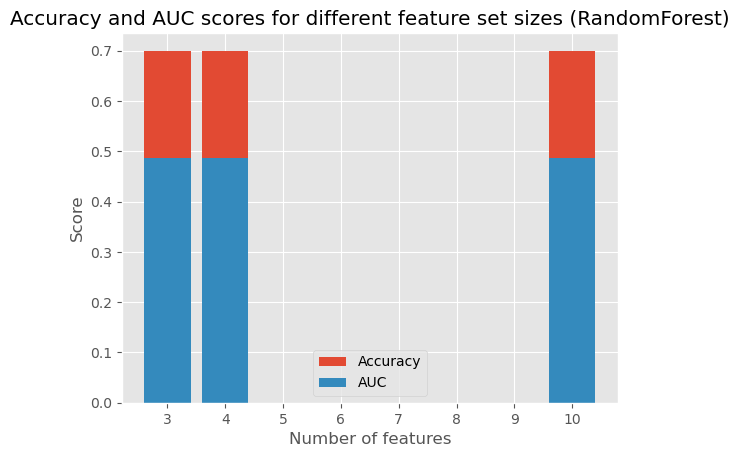

In [129]:
import pandas as pd
from datetime import timedelta

# Preprocess data to convert "OVERALL TIME" and "HS_CALC_MILE" columns to seconds
X_train_preprocessed = X_train.copy()
X_train_preprocessed['OVERALL TIME'] = pd.to_timedelta(X_train_preprocessed['OVERALL TIME']).dt.total_seconds()
X_train_preprocessed['HS_CALC_MILE'] = pd.to_timedelta(X_train_preprocessed['HS_CALC_MILE']).dt.total_seconds()

X_test_preprocessed = X_test.copy()
X_test_preprocessed['OVERALL TIME'] = pd.to_timedelta(X_test_preprocessed['OVERALL TIME']).dt.total_seconds()
X_test_preprocessed['HS_CALC_MILE'] = pd.to_timedelta(X_test_preprocessed['HS_CALC_MILE']).dt.total_seconds()

# Define the pipeline to estimator be RandomForest Classifier 
pipe_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('rfe', RFE(estimator=RandomForestClassifier())),
    ('classifier', RandomForestClassifier())
])

# Define the number of features to evaluate
n_features_to_select = [3, 4, 10]

# Initialize empty lists for storing accuracy and AUC scores
accuracy_scores_rf = []
auc_scores_rf = []

# Loop through each number of features
for n in n_features_to_select:
    # Set the number of features for RFE
    pipe_rf.named_steps['rfe'].n_features_to_select = n

    # Fit the pipeline and get accuracy score
    pipe_rf.fit(X_train_preprocessed, y_train)
    y_pred = pipe_rf.predict(X_test_preprocessed)
    acc_score_rf = accuracy_score(y_test, y_pred)

    # Get AUC score
    y_pred_proba = pipe_rf.predict_proba(X_test_preprocessed)[:, 1]
    auc_score_rf = roc_auc_score(y_test, y_pred_proba)

    # Calculate and store accuracy and AUC scores
    accuracy_scores_rf.append(acc_score)
    auc_scores_rf.append(auc_score)

# Create dataframe of scores
scores_rf = pd.DataFrame({
    'n_features_selected': n_features_to_select,
    'accuracy': accuracy_scores_rf,
    'auc': auc_scores_rf
})

# Add a column for the average of accuracy and AUC scores
scores_rf['avg_score'] = (scores_dt['accuracy'] + scores_dt['auc']) / 2

# Print the data
print(scores_rf)

# Create bar chart of scores
fig, ax = plt.subplots()

ax.bar(n_features_to_select, accuracy_scores_rf, label='Accuracy')
ax.bar(n_features_to_select, auc_scores_rf, label='AUC')

ax.set_xlabel('Number of features')
ax.set_ylabel('Score')
ax.set_title('Accuracy and AUC scores for different feature set sizes (RandomForest)')
ax.legend()

# Save the plot
plt.savefig('random_forest_scores.png')

plt.show()


### Random Forest initially gives a 59.3% accuracy - about the same 3,4, or 10 features are selected 

In [130]:
# Create a table with predicted and actual values from Random Forest Model
results_rf = pd.DataFrame({'Predicted': y_pred, 'Actual': y_test})

# Merge with the "FULL_NAME" column from the original dataframe
results_merged_rf = pd.concat([modeling_data[['FULL_NAME']], results_rf], axis=1)

# Print the merged table
print(results_merged_rf)   

            FULL_NAME  Predicted  Actual
0       Callum Bolger        1.0     1.0
1     Jared Rodriguez        NaN     NaN
2       Joseph Garcia        NaN     NaN
3         Ryan Cutter        NaN     NaN
4      Anthony Grover        1.0     1.0
..                ...        ...     ...
145       Finn Waters        0.0     1.0
146    Andrew Hazzard        1.0     0.0
147  Michael Robinson        NaN     NaN
148     Alberto Lopez        NaN     NaN
149     Uriel Mercado        NaN     NaN

[150 rows x 3 columns]


In [131]:
results_rf

,Predicted,Actual
73,1,1
18,1,0
118,1,1
78,1,1
76,1,1
31,1,1
64,1,1
141,1,1
68,1,1
82,1,0


In [132]:
print(pipe_rf.named_steps['classifier'])

RandomForestClassifier()


In [133]:
# Calculate false positive and false negative results for model 

false_positive = ((results_merged_rf['Predicted'] == 1) & (results_merged_rf['Actual'] == 0)).sum()
false_negative = ((results_merged_rf['Predicted'] == 0) & (results_merged_rf['Actual'] == 1)).sum()

# Calculate total predictions
total_predictions = len(results_merged_rf)

# Calculate percentages
false_positive_percentage = (false_positive / total_predictions) * 100
false_negative_percentage = (false_negative / total_predictions) * 100

# Print the percentages
print("False Positive Percentage:", false_positive_percentage)
print("False Negative Percentage:", false_negative_percentage)


False Positive Percentage: 10.666666666666668
False Negative Percentage: 1.3333333333333335


### Optimize the RandomForest Classifier with a GRID SEARCH

In [134]:
help(GridSearchCV)

Help on class GridSearchCV in module sklearn.model_selection._search:

class GridSearchCV(BaseSearchCV)
 |  GridSearchCV(estimator, param_grid, *, scoring=None, n_jobs=None, refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)
 |  
 |  Exhaustive search over specified parameter values for an estimator.
 |  
 |  Important members are fit, predict.
 |  
 |  GridSearchCV implements a "fit" and a "score" method.
 |  It also implements "score_samples", "predict", "predict_proba",
 |  "decision_function", "transform" and "inverse_transform" if they are
 |  implemented in the estimator used.
 |  
 |  The parameters of the estimator used to apply these methods are optimized
 |  by cross-validated grid-search over a parameter grid.
 |  
 |  Read more in the :ref:`User Guide <grid_search>`.
 |  
 |  Parameters
 |  ----------
 |  estimator : estimator object
 |      This is assumed to implement the scikit-learn estimator interface.
 |      Either est

In [135]:
# Explore the Random Forest Classifier paraemeters
RFModel=RandomForestClassifier()

In [136]:
RFModel.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [137]:
#Check type of y_train and y_test is integer
print(y_train)
print(y_test)

123    1
24     1
25     1
23     1
94     1
      ..
71     1
106    1
14     1
92     1
102    1
Name: RUN_IN_COLLEGE_VARSITY?, Length: 90, dtype: int64
73     1
18     0
118    1
78     1
76     1
31     1
64     1
141    1
68     1
82     0
110    0
12     0
36     1
9      1
19     0
56     1
104    1
69     1
55     1
132    1
29     0
127    1
26     0
128    1
131    1
145    1
108    1
143    1
45     0
30     1
22     0
15     1
65     1
11     1
42     0
146    0
51     0
27     1
4      1
32     1
142    1
85     0
86     0
16     1
10     1
81     1
133    1
137    0
75     1
109    1
96     1
105    1
66     1
0      1
122    1
67     1
28     1
40     1
44     0
60     1
Name: RUN_IN_COLLEGE_VARSITY?, dtype: int64


In [138]:
# Ensure the target variable is of integer type
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [139]:
# define the parameter grid to explore values of n_estimators (# of trees) and max_depth


In [140]:
param_gridRF = {'n_estimators': [10,50,100], 'max_depth': [3,5,10]}

In [141]:
grid_search_rf = GridSearchCV(estimator = RandomForestClassifier(), param_grid= param_gridRF, scoring= "accuracy")

In [142]:
print(grid_search_rf)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 10],
                         'n_estimators': [10, 50, 100]},
             scoring='accuracy')


In [143]:
#Fit grid search to training data
grid_search_rf.fit(X_train_preprocessed, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 10],
                         'n_estimators': [10, 50, 100]},
             scoring='accuracy')

In [144]:
from sklearn.metrics import get_scorer_names
scorer_names = get_scorer_names()
print(scorer_names)

['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'matthews_corrcoef', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_negative_likelihood_ratio', 'neg_root_mean_squared_error', 'normalized_mutual_info_score', 'positive_likelihood_ratio', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'rand_score', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'roc_auc_ovo', 'roc_auc_ovo_weight

In [145]:
#Get the best estimator and parameters from grid search
best_model_rf = grid_search_rf.best_estimator_
best_parameters_rf = grid_search_rf.best_params_
print("Best Model (Random Forest):", best_model_rf)
print("Best Parameters (Random Forest):", best_parameters_rf)

Best Model (Random Forest): RandomForestClassifier(max_depth=3, n_estimators=10)
Best Parameters (Random Forest): {'max_depth': 3, 'n_estimators': 10}


In [146]:
# Apply best model to test data to check accuracy
y_pred = best_model_rf.predict(X_test_preprocessed)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy (Random Forest):", accuracy)

Accuracy (Random Forest): 0.7333333333333333


In [147]:
# Obtain grid search results with scores for each combination of hyperparameters
grid_search_results_rf = grid_search.cv_results_


In [148]:
# Print the grid search results
print(grid_search_results_rf)

{'mean_fit_time': array([0.009761  , 0.00630736, 0.00830908, 0.00733986, 0.00684762,
       0.00615706]), 'std_fit_time': array([0.00284161, 0.00081883, 0.00062464, 0.00114079, 0.00054611,
       0.00073761]), 'mean_score_time': array([0.00294933, 0.00268264, 0.00289268, 0.0027204 , 0.00228887,
       0.00223923]), 'std_score_time': array([0.00068539, 0.00044562, 0.00030759, 0.00049182, 0.00026228,
       0.00028851]), 'param_feature_selection__k': masked_array(data=[5, 5, 10, 10, 15, 15],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_regression__fit_intercept': masked_array(data=[True, False, True, False, True, False],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'feature_selection__k': 5, 'regression__fit_intercept': True}, {'feature_selection__k': 5, 'regression__fit_intercept': False}, {'feature_selection__k': 10, 'regression__fit_i

In [149]:
# Create a table with predicted and actual values from the best model
y_pred = best_model_rf.predict(X_test_preprocessed)
results_rf = pd.DataFrame({'Predicted': y_pred, 'Actual': y_test})

# Merge with the "FULL_NAME" column from the original dataframe
results_merged_rf = pd.concat([modeling_data[['FULL_NAME']], results_rf], axis=1)

# Print the merged table
print(results_merged_rf)

            FULL_NAME  Predicted  Actual
0       Callum Bolger        1.0     1.0
1     Jared Rodriguez        NaN     NaN
2       Joseph Garcia        NaN     NaN
3         Ryan Cutter        NaN     NaN
4      Anthony Grover        1.0     1.0
..                ...        ...     ...
145       Finn Waters        1.0     1.0
146    Andrew Hazzard        1.0     0.0
147  Michael Robinson        NaN     NaN
148     Alberto Lopez        NaN     NaN
149     Uriel Mercado        NaN     NaN

[150 rows x 3 columns]


In [150]:
# Obtain grid search results with scores for each combination of hyperparameters
grid_search_results_rf = pd.DataFrame(grid_search_rf.cv_results_)

# Select relevant columns
columns_to_select = ['param_n_estimators', 'param_max_depth', 'mean_test_score']
grid_search_results_rf = grid_search_results_rf[columns_to_select]

# Rename columns for better readability
grid_search_results_rf = grid_search_results_rf.rename(columns={'param_n_estimators': 'n_estimators',
                                                                'param_max_depth': 'max_depth',
                                                                'mean_test_score': 'accuracy'})

# Sort the results by accuracy in descending order
grid_search_results_rf = grid_search_results_rf.sort_values(by='accuracy', ascending=False)

# Reset the index
grid_search_results_rf = grid_search_results_rf.reset_index(drop=True)

# Print the formatted table
print(grid_search_results_rf)

  n_estimators max_depth  accuracy
0           10         3  0.844444
1           50         3  0.844444
2          100         3  0.844444
3           50         5  0.844444
4          100         5  0.844444
5           50        10  0.844444
6          100        10  0.844444
7           10         5  0.833333
8           10        10  0.822222


## RANDOM FOREST RESULTS: The best accuracy result score using a GridSearch was obtained by a Random Forest Model with 10 estimators and a maximum decision tree depth of 3, providing an accuracy of 84.4% - the best yet! 

# MODEL CONCLUSIONS/LEARNINGS


## PHASE 1 for EARLY DATA EXPLORATION (EDA) 


PHASE 1 for EARLY DATA EXPLORATION (EDA) With very little data (20 rows) two classification models were applied with different hyperparameter settings against the top California running data from 2016 to predict if the athlete will run in college with 50% accuracy using Logistic Regression and 75% accuracy using Decision Tree classification to determine if the athlete would run in college or not. It is too early to rely on these results because the data is not complete - however, early analysis does give the indication that Decision Tree modeling would be a good approach for this analysis project. It also indicates that perhaps there are not that many factors beyond a few that influence if the runner continues running into college. Note that the data being used is already selecting the top runners in California by nature of them being in the top 30 at State so it's agreed they are all good runners - so what other factors contribute to continuing into college?

## FINAL PROJECT SUMMARY: 


For the Final Project, only the question of whether the top California Cross Country runner (from top 30 2016 results across all divisions) would run collegiately or not. 
The Logistic Regression, Decision Tree Models were improved from the EDA PHASE I and a Random Model was created as well using a GridSearch algorithm to dramatically increase it's accuracy. 


### RESULTS: 

##### Logistic Regression Results: 

### The best Logistic Regression model results gave an accuracy of 58.8% accuracy

##### Decision Tree Results: 

### Decision Tree Model produced an accuracy of 59.3% (with 10 features selected giving best results)¶ The output of the Decision Tree model was very interesting because it consistently showed the DIVISION the athlete ran in to be the most important decision factor for whether the athlete would continue to run in college. 

#### The Decision Tree Model first splits the decision based on the DIVISION the athlete ran in at the State Championships and then their OVERALL TIME, and then the next important features are the High School Year and the SCHOOL THEY WENT TO


##### Random Forest Results: 

### Random Forest initially gives a 59.3% accuracy - about the same 3,4, or 10 features are selected. 
### However, when the gridsearch was applied to find the best hyperparameters for the model, the accuracy increased to 84.4% using 10 estimators and a maximum decision tree depth of 3. 

### CONCLUSIONS: 

## The following are the key take-aways from Phase 1 of this analysis project: 

#### -- It appears that the majority of top California distance boy runners continue on to compete in college each year or about 3/4ths of the runners.  It seems that the athlete's school size (division) and cross country/track program plays a very large role in whether the athlete will continue on into college.  Other factors include the particular school the athlete is from and actually the religion of the athlete as many Christian schools offer running scholarships or programs. How fast the athlete runs in high school only matters up to a point. Several who ran incredibly fast in high school go on to run well in college while others don't. And several that ran pretty well in high school go on to run extremely well in college, surpassing those that beat them in high school.  

#### All of these initial modeling results and findings lead me to believe that it is actually the PROGRAM that makes the ATHLETE as opposed to the ATHLETE that makes the PROGRAM.  By PROGRAM I mean not just the coach but also the SIZE of the team, the LOCATION of the school, the ECONOMIC wealth of the program, the SUPPORT given the athlete (in terms of adult support/nutrition/team culture/etc), and the COMMITMENT to the team by the ATHLETE.  

## NEXT STEPS ##


**NEXT STEPS:** 
* -- expand data beyond 2016 runners only - this is incredibly manual and time consuming to collate the data together 
* -- do further data analysis to compare time improvements from high school to college and to understand any data trends based on which high school, which division (school size) and which section (school location) to see if this affected the results in any significant way? 
*  -- do further data analysis to compare collegiate choices and to see if doing well in hs means getting recruited to "better" programs and thus basically sets your trajectory as a runner for college - ie. if you don't get recruited to a "top program" can you still be successful in  college? How much do people improve by by college?
*  -- do further analysis to understand if the section (geographic location) the runner comes from influences likelihood to run in college (i.e. socio-economic factors in play due to geographic region?) 
*  -- do further data analysis to understand if the high school XC 5k time or track mile time is a better predictor for success in collegiate running 

